# 제품 이상여부 판별 프로젝트


## 1. 데이터 불러오기


### 필수 라이브러리


In [1970]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 읽어오기


In [1971]:
RANDOM_STATE = 110

train_data = pd.read_csv("train_data_forEDA.csv")
test_data = pd.read_csv("test_data_forEDA.csv")

---

반복적으로 쓰는 툴 함수화

In [1972]:
def plot_box(dataframe, column_name):
    """
    주어진 데이터프레임과 열 이름에 대해 박스 플롯을 그리는 함수.

    Parameters:
    dataframe (pd.DataFrame): 데이터프레임
    column_name (str): 열 이름
    """
    plt.figure(figsize=(10, 6))
    plt.boxplot(dataframe[column_name], vert=False)
    plt.xlabel(column_name)
    plt.title(f'Box Plot of {column_name}')
    plt.show()

In [1973]:
import pandas as pd

def value_counts_with_target_ratio(dataframe, column_name, target_name):
    """
    주어진 데이터프레임의 특정 열에 대해 각 값마다 타겟 변수의 비율을 출력하는 함수.

    Parameters:
    dataframe (pd.DataFrame): 데이터프레임
    column_name (str): 열 이름
    target_name (str): 타겟 변수 이름
    """
    # 각 값마다 타겟 변수의 비율 계산
    value_counts = dataframe.groupby(column_name)[target_name].value_counts(normalize=True).unstack().fillna(0)
    
    # 결과 출력
    print(value_counts)

In [1974]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_abnormal_ratio(dataframe, column_name, target_name, target_value, bins=20):
    """
    주어진 데이터프레임의 특정 열에 대해 각 값마다 타겟 변수의 특정 값 비율을 계산하고 막대그래프로 표시하는 함수.

    Parameters:
    dataframe (pd.DataFrame): 데이터프레임
    column_name (str): 열 이름
    target_name (str): 타겟 변수 이름
    target_value (str): 타겟 변수의 특정 값
    bins (int): 구간의 수 (기본값은 20)
    """
    def abnormal_ratio(dataframe, column_name, target_name, target_value):
        """
        주어진 데이터프레임의 특정 열에 대해 각 값마다 타겟 변수의 특정 값 비율을 계산하는 함수.

        Parameters:
        dataframe (pd.DataFrame): 데이터프레임
        column_name (str): 열 이름
        target_name (str): 타겟 변수 이름
        target_value (str): 타겟 변수의 특정 값

        Returns:
        pd.DataFrame: 각 값마다 타겟 변수의 특정 값 비율을 포함하는 데이터프레임
        """
        # 각 값마다 타겟 변수의 특정 값 비율 계산
        value_counts = dataframe.groupby(column_name)[target_name].apply(lambda x: (x == target_value).mean()).reset_index()
        count_counts = dataframe.groupby(column_name)[target_name].count().reset_index()
        
        value_counts.columns = [column_name, 'ratio']
        count_counts.columns = [column_name, 'count']
        
        # 비율과 카운트를 병합
        result = pd.merge(value_counts, count_counts, on=column_name)
        return result

    # column_name 값을 지정된 구간으로 나누기
    dataframe[f'{column_name}_bins'] = pd.cut(dataframe[column_name], bins=bins)

    # 비율 계산
    ratios = abnormal_ratio(dataframe, f'{column_name}_bins', target_name, target_value)

    # 막대그래프 그리기
    plt.figure(figsize=(20, 10))
    barplot = sns.barplot(x=f'{column_name}_bins', y='ratio', data=ratios, color='skyblue')
    plt.xlabel(f'{column_name} (binned)')
    plt.ylabel('AbNormal Ratio')
    plt.title(f'AbNormal Ratio by {column_name} (binned)', pad=30)  # 제목과 그래프 사이의 간격 조정
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

    # 각 막대 위에 비율 값과 카운트 표시
    for p in barplot.patches:
        # 막대의 x 좌표에 해당하는 구간을 찾기
        bin_label = ratios[f'{column_name}_bins'].cat.categories[int(p.get_x() + p.get_width() / 2) - 1]
        count_value = ratios.loc[ratios[f'{column_name}_bins'] == bin_label, 'count'].values[0]
        barplot.annotate(f'{format(p.get_height(), ".2f")} ({count_value})', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 9), 
                         textcoords='offset points')

    plt.show()

    # _bins 변수 드랍
    dataframe.drop(columns=[f'{column_name}_bins'], inplace=True)


---

## Dam

## AutoClave

In [1975]:
# 오타인 변수명 변경
train_data = train_data.rename(columns={'1st Pressure 1st Pressure Unit Time_AutoClave': '1st Pressure Unit Time_AutoClave'})
test_data = test_data.rename(columns={'1st Pressure 1st Pressure Unit Time_AutoClave': '1st Pressure Unit Time_AutoClave'})

In [1976]:
# '_AutoClave'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_AutoClave').columns

# 필터링된 열 이름 출력
print("필터링된 열 이름:")
for col in Process_Desc_col:
    print(col)

필터링된 열 이름:
1st Pressure Collect Result_AutoClave
1st Pressure Unit Time_AutoClave
2nd Pressure Collect Result_AutoClave
2nd Pressure Unit Time_AutoClave
3rd Pressure Collect Result_AutoClave
3rd Pressure Unit Time_AutoClave
Chamber Temp. Collect Result_AutoClave
Chamber Temp. Unit Time_AutoClave
Chamber Temp. Judge Value_AutoClave
GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave
GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave


In [1977]:
value_counts_with_target_ratio(train_data, 'Chamber Temp. Unit Time_AutoClave', 'target')

target                             AbNormal    Normal
Chamber Temp. Unit Time_AutoClave                    
3                                  0.000000  1.000000
61                                 1.000000  0.000000
121                                0.000000  1.000000
180                                1.000000  0.000000
183                                1.000000  0.000000
212                                0.500000  0.500000
242                                0.500000  0.500000
243                                0.000000  1.000000
300                                0.214286  0.785714
301                                0.137931  0.862069
303                                0.090909  0.909091
360                                0.050279  0.949721
361                                0.050254  0.949746
362                                0.063291  0.936709
363                                0.047702  0.952298
423                                0.000000  1.000000
450                         

In [1978]:
train_data['Chamber Temp. Collect Result_AutoClave'].value_counts()

54    8427
49    5836
50    5652
53    5342
48    3347
55    3282
52    2081
47    1787
56    1699
51    1478
57     951
46     376
58     102
45      37
36      33
32      23
43      20
37       6
38       6
59       4
33       4
35       4
44       3
40       3
34       2
42       1
Name: Chamber Temp. Collect Result_AutoClave, dtype: int64

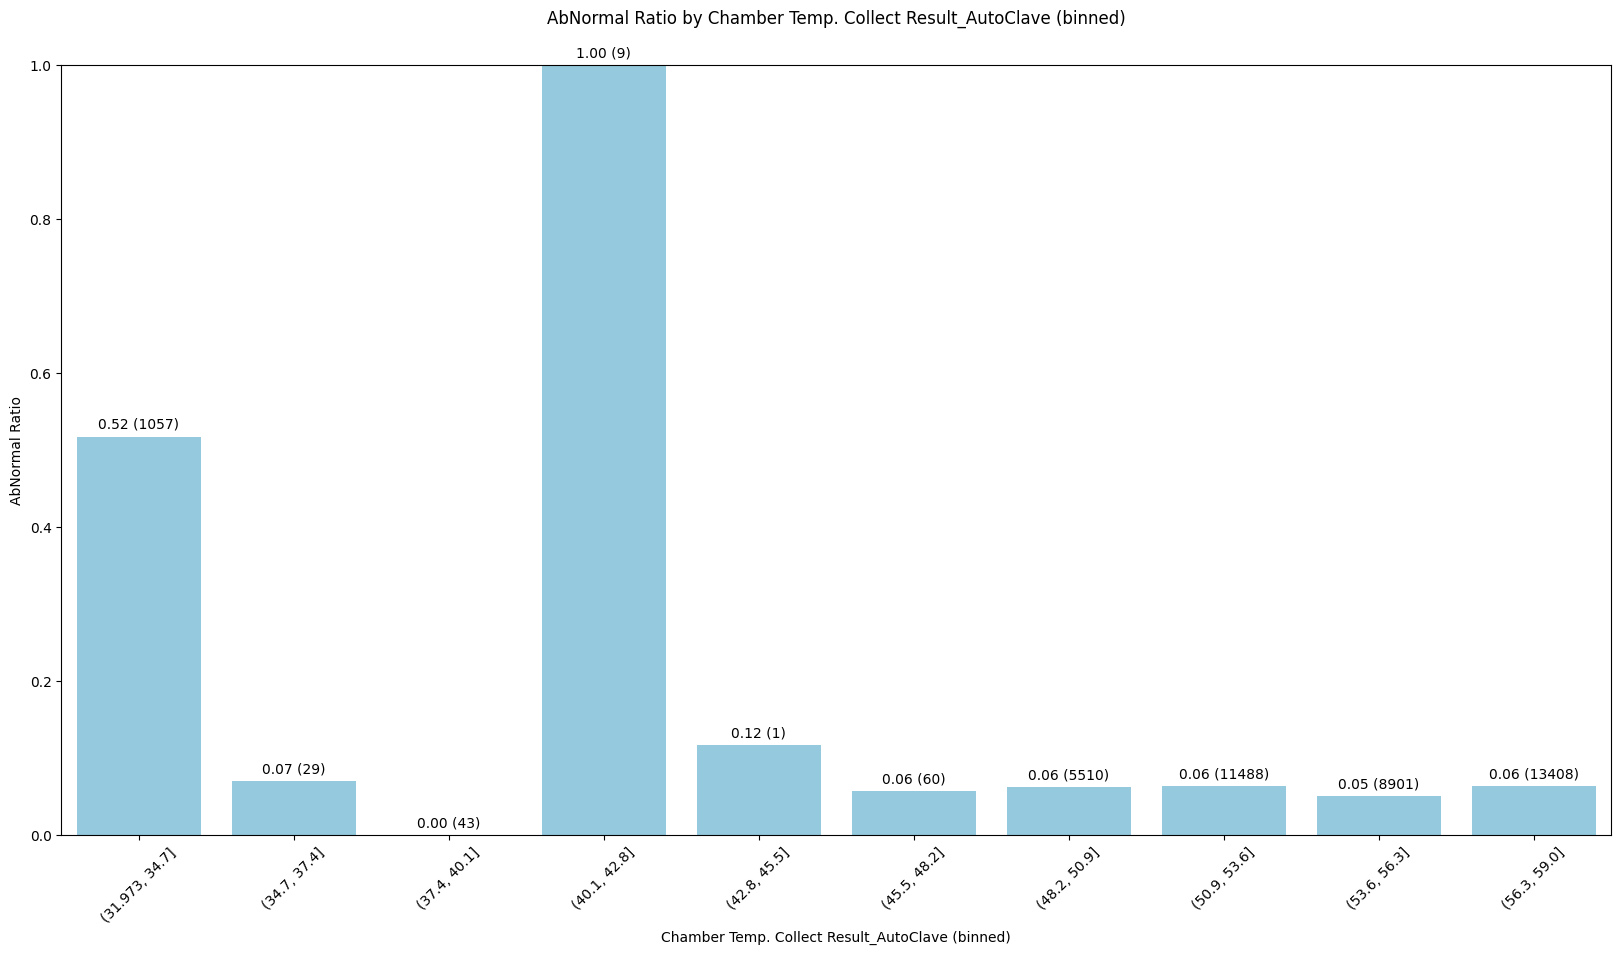

In [1979]:
plot_abnormal_ratio(train_data, 'Chamber Temp. Collect Result_AutoClave', 'target', 'AbNormal',10)

In [1980]:
train_data['Chamber Temp. Unit Time_AutoClave'].value_counts()

363    14842
483    10802
480     6003
361     3940
510     1712
452     1510
450      424
362      395
481      371
360      179
512       82
540       72
423       55
301       29
212       24
300       14
183       13
303       11
243        9
180        6
242        6
3          4
61         2
121        1
Name: Chamber Temp. Unit Time_AutoClave, dtype: int64

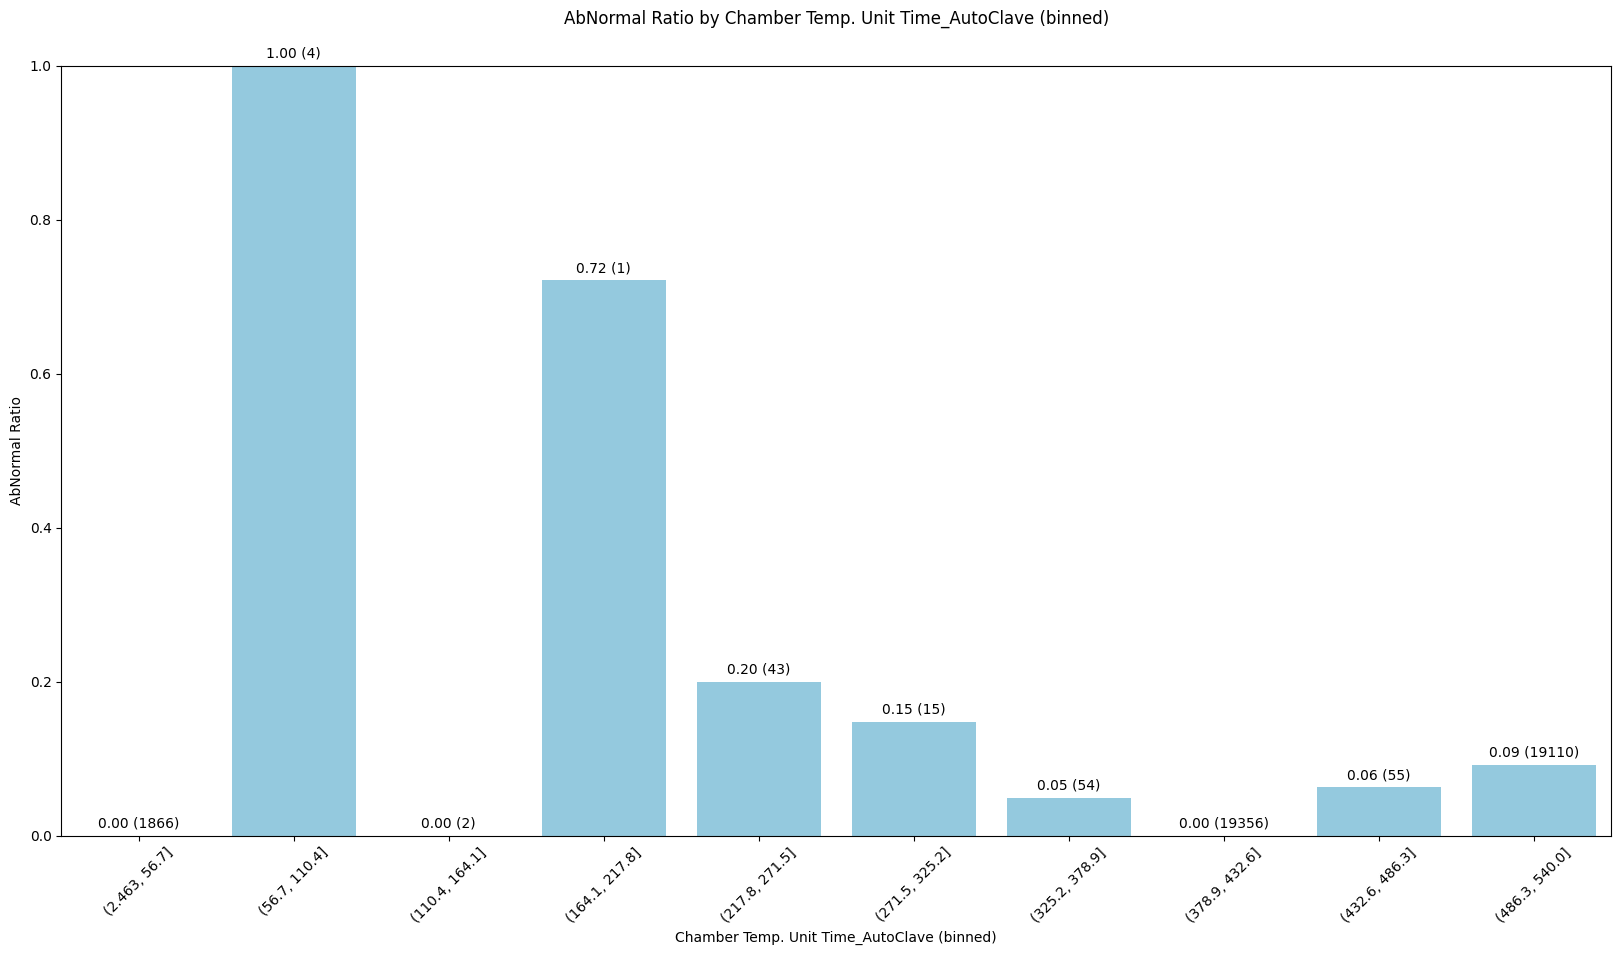

In [1981]:
plot_abnormal_ratio(train_data, 'Chamber Temp. Unit Time_AutoClave', 'target', 'AbNormal',10)

Chamber Temp의 온도 자체가 크거나 시간이 크다고 해서 AdNormal 비율이 눈에 띄게 커지는 등의 수치는 안보임  
-> Chamber Temp 의 값과 시간을 곱하는 Chamber_Temp_x 변수를 만들어줌

In [1982]:
train_data['Chamber_Temp_x_AutoClave'] = train_data['Chamber Temp. Collect Result_AutoClave'] * train_data['Chamber Temp. Unit Time_AutoClave']
test_data['Chamber_Temp_x_AutoClave'] = test_data['Chamber Temp. Collect Result_AutoClave'] * test_data['Chamber Temp. Unit Time_AutoClave']

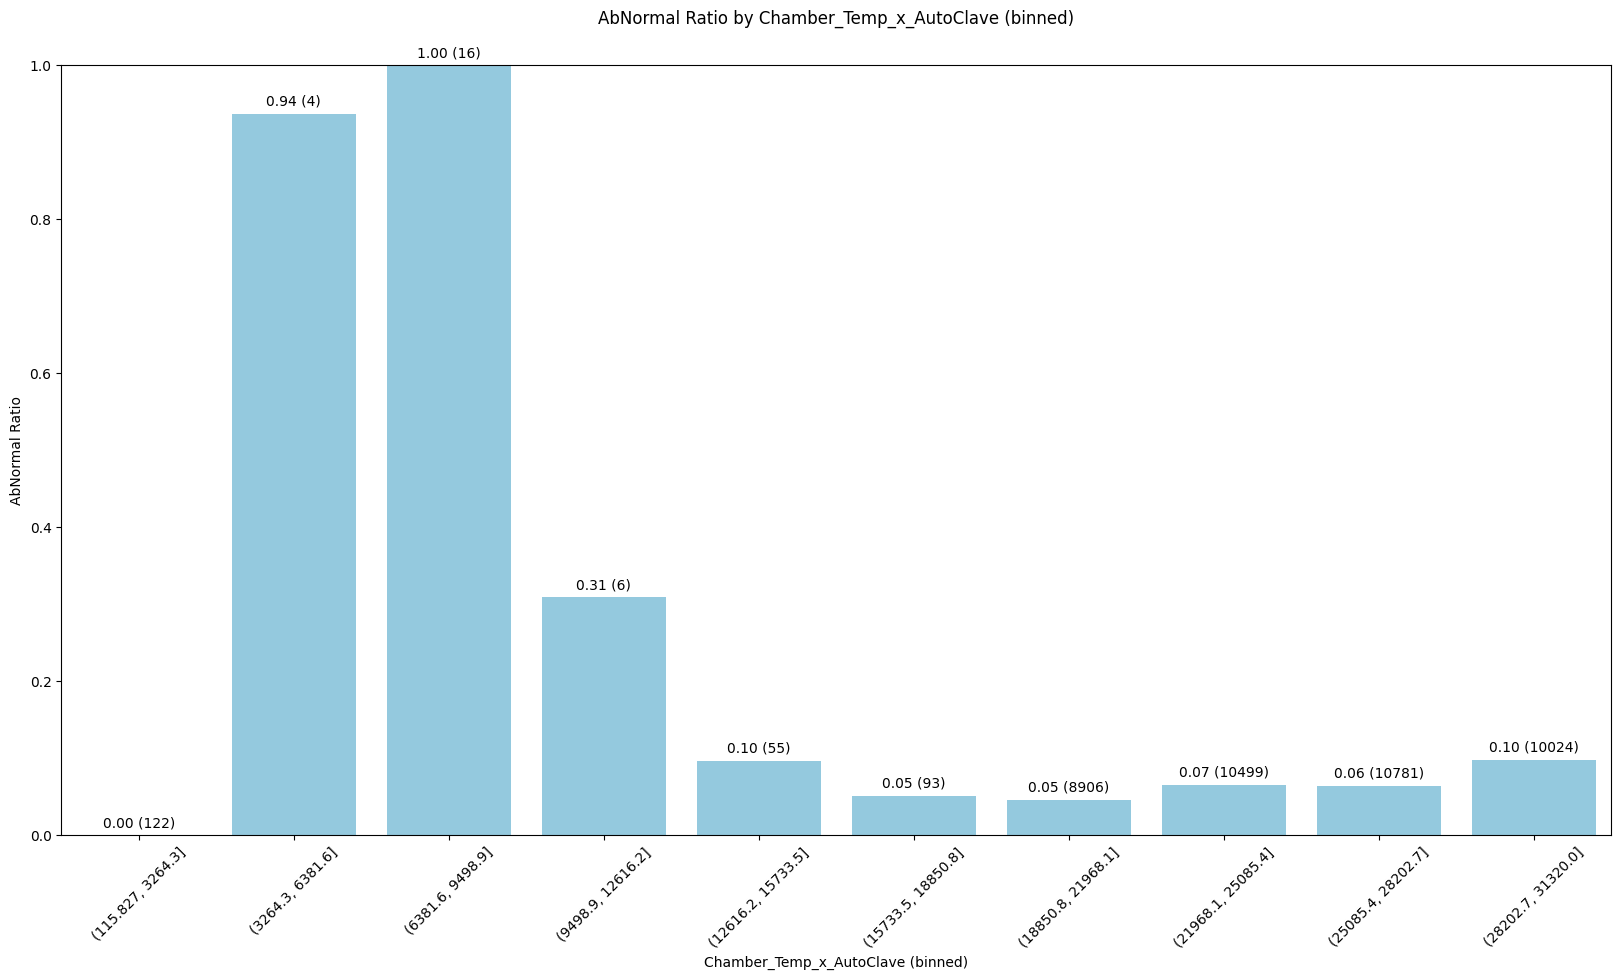

In [1983]:
plot_abnormal_ratio(train_data, 'Chamber_Temp_x_AutoClave', 'target', 'AbNormal',10)

In [1984]:
train_data.drop(columns=['Chamber Temp. Collect Result_AutoClave', 'Chamber Temp. Unit Time_AutoClave'], inplace=True)
test_data.drop(columns=['Chamber Temp. Collect Result_AutoClave', 'Chamber Temp. Unit Time_AutoClave'], inplace=True)

[1705, 11057] 구간에서 비정상 비중이 커짐을 보임 -> 파생변수 만들어 주는것이 유의미하다고 판단  
(0,1) 값으로 구간을 나누는 작업은 진행하지 않고 Chamber_Temp_x 변수만 만듬

In [1985]:
train_data['Chamber Temp. Judge Value_AutoClave'].value_counts()

OK    29112
NG    11394
Name: Chamber Temp. Judge Value_AutoClave, dtype: int64

In [1986]:
# OK 값이면 1, NG 값이면 0을 부여
train_data['Chamber_Temp_ok_AutoClave'] = train_data['Chamber Temp. Judge Value_AutoClave'].apply(lambda x: 1 if x == 'OK' else 0)
test_data['Chamber_Temp_ok_AutoClave'] = test_data['Chamber Temp. Judge Value_AutoClave'].apply(lambda x: 1 if x == 'OK' else 0)

# 결과 확인
print(train_data['Chamber_Temp_ok_AutoClave'].value_counts())

1    29112
0    11394
Name: Chamber_Temp_ok_AutoClave, dtype: int64


In [1987]:
train_data['ok_Chamber_Temp_x_AutoClave'] = train_data['Chamber_Temp_x_AutoClave'] * train_data['Chamber_Temp_ok_AutoClave']
test_data['ok_Chamber_Temp_x_AutoClave'] = test_data['Chamber_Temp_x_AutoClave'] * test_data['Chamber_Temp_ok_AutoClave']

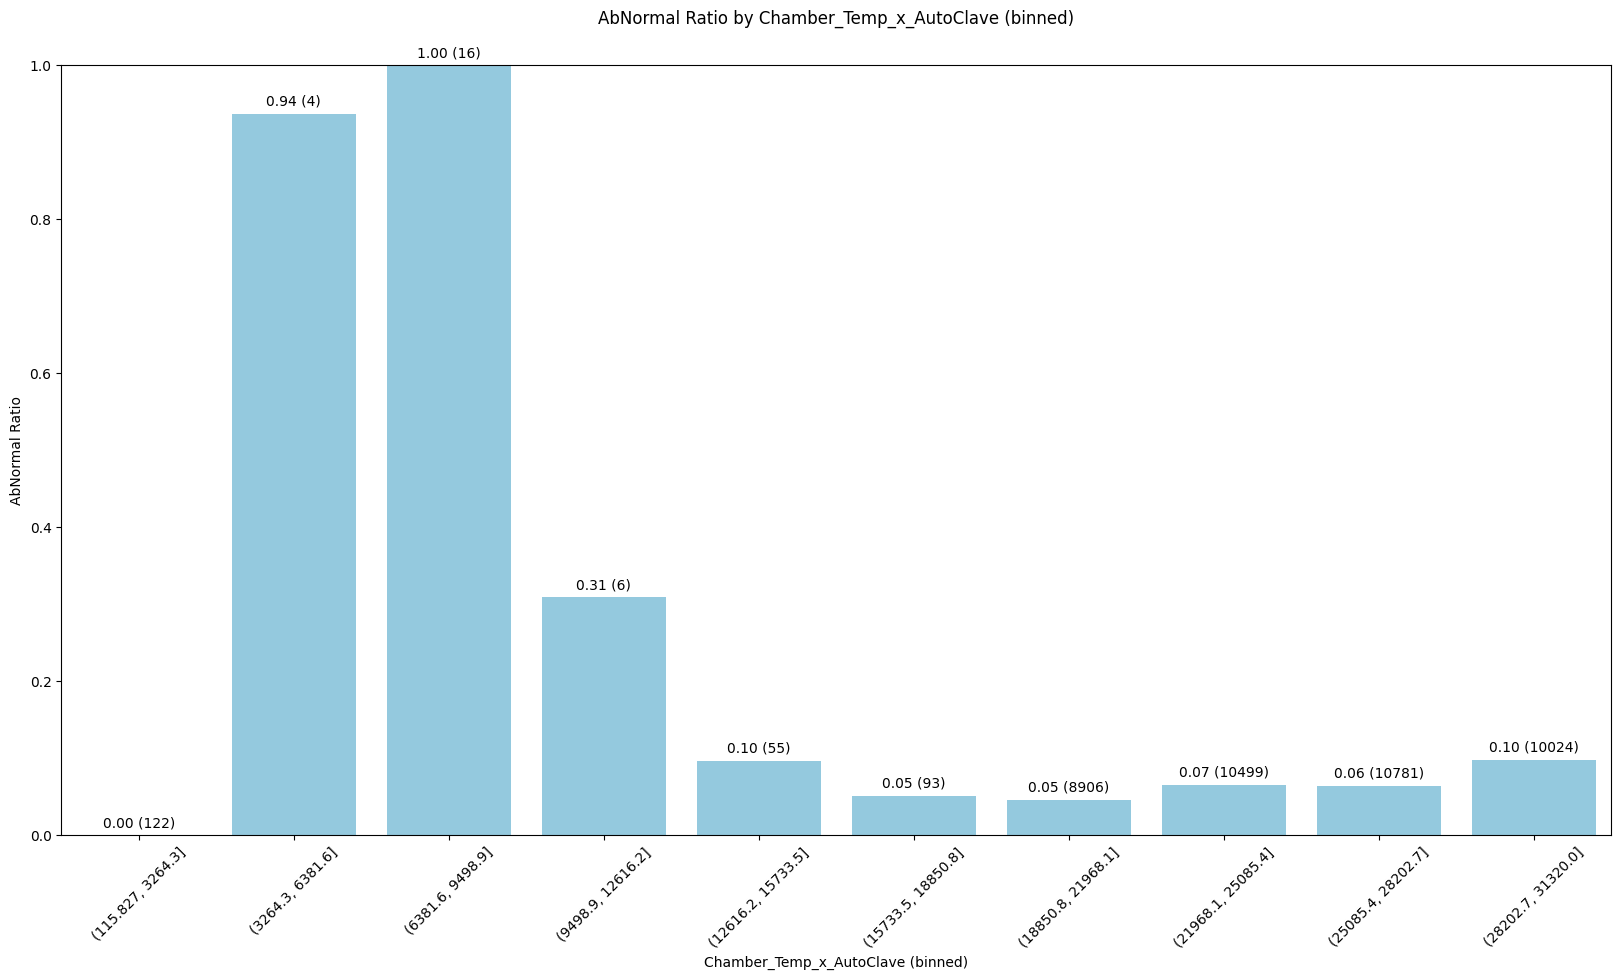

In [1988]:
plot_abnormal_ratio(train_data, 'Chamber_Temp_x_AutoClave', 'target', 'AbNormal',10)

In [1989]:
train_data.drop(columns=['Chamber Temp. Judge Value_AutoClave', 'ok_Chamber_Temp_x_AutoClave'], inplace=True)
test_data.drop(columns=['Chamber Temp. Judge Value_AutoClave', 'ok_Chamber_Temp_x_AutoClave'], inplace=True)

# Chamber_Temp_ok_AutoClave 변수제거 코드 주석처리
# train_data.drop(columns=['Chamber_Temp_ok_AutoClave'], inplace=True)
# test_data.drop(columns=['Chamber_Temp_ok_AutoClave'], inplace=True)

Chamber_Temp_ok(Chamber Temp. Judge Value_AutoClave) 변수가 유의미하게 쓰이지 않는다고 판단된다

In [1990]:
# '_AutoClave'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_AutoClave').columns

# 필터링된 열 이름 출력
print("필터링된 열 이름:")
for col in Process_Desc_col:
    print(col)

필터링된 열 이름:
1st Pressure Collect Result_AutoClave
1st Pressure Unit Time_AutoClave
2nd Pressure Collect Result_AutoClave
2nd Pressure Unit Time_AutoClave
3rd Pressure Collect Result_AutoClave
3rd Pressure Unit Time_AutoClave
GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave
GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave
Chamber_Temp_x_AutoClave
Chamber_Temp_ok_AutoClave


In [1991]:
# 두 열에 대해 그룹화 및 각 그룹별로 갯수 계산
grouped_counts = train_data.groupby([
    'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave'
    , 'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave']
    ).size().reset_index(name='counts')

# 결과 출력
print(grouped_counts)

  GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave  \
0                                                 OK     

  GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave  counts  
0                                                OK   11293  


In [1992]:
# GMES_ORIGIN_INSP_JUDGE_CODE_AutoClave 변수 1개만 남기고 나머지 제거
# 변수명 변경
train_data = train_data.rename(columns={'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave': 'GMES_ORIGIN_INSP_JUDGE_CODE_AutoClave'})
test_data = test_data.rename(columns={'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave': 'GMES_ORIGIN_INSP_JUDGE_CODE_AutoClave'})

# GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave 변수 제거
train_data.drop(columns=['GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave'], inplace=True)
test_data.drop(columns=['GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave'], inplace=True)

In [1993]:
# OK 값이면 1, NG 값이면 0을 부여
train_data['GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave'] = train_data['GMES_ORIGIN_INSP_JUDGE_CODE_AutoClave'].apply(lambda x: 1 if x == 'OK' else 0)
test_data['GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave'] = test_data['GMES_ORIGIN_INSP_JUDGE_CODE_AutoClave'].apply(lambda x: 1 if x == 'OK' else 0)

# GMES_ORIGIN_INSP_JUDGE_CODE_AutoClave 변수 제거
train_data.drop(columns=['GMES_ORIGIN_INSP_JUDGE_CODE_AutoClave'], inplace=True)
test_data.drop(columns=['GMES_ORIGIN_INSP_JUDGE_CODE_AutoClave'], inplace=True)

# 결과 확인
print(train_data['GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave'].value_counts())

0    29213
1    11293
Name: GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave, dtype: int64


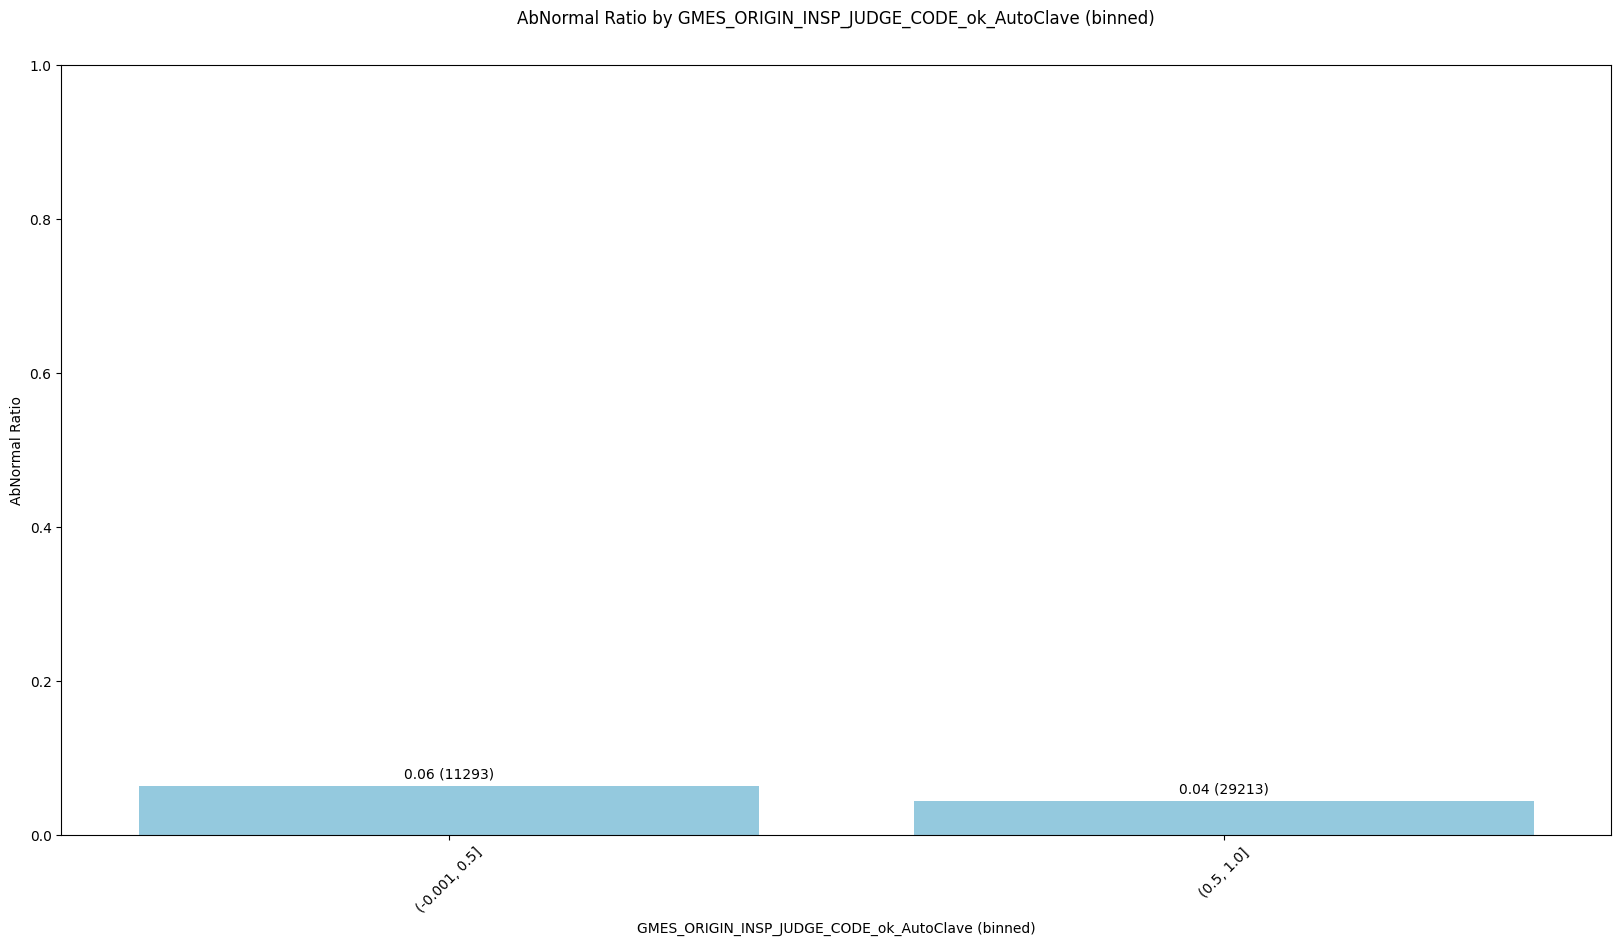

In [1994]:
plot_abnormal_ratio(train_data, 'GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave', 'target', 'AbNormal',2)

In [1995]:
# '_AutoClave'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_AutoClave').columns

# 필터링된 열 이름 출력
print("필터링된 열 이름:")
for col in Process_Desc_col:
    print(col)

필터링된 열 이름:
1st Pressure Collect Result_AutoClave
1st Pressure Unit Time_AutoClave
2nd Pressure Collect Result_AutoClave
2nd Pressure Unit Time_AutoClave
3rd Pressure Collect Result_AutoClave
3rd Pressure Unit Time_AutoClave
Chamber_Temp_x_AutoClave
Chamber_Temp_ok_AutoClave
GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave


In [1996]:
train_data['1st Pressure Collect Result_AutoClave'].value_counts()

0.311    2932
0.310    2723
0.301    2705
0.312    2631
0.309    2586
0.313    2423
0.302    2311
0.300    2308
0.308    2281
0.314    2275
0.303    2109
0.305    1934
0.299    1841
0.315    1801
0.304    1791
0.307    1491
0.306    1434
0.298    1212
0.316     891
0.297     334
0.317     333
0.318      83
0.296      39
0.319      15
0.292      12
0.290       8
0.295       3
Name: 1st Pressure Collect Result_AutoClave, dtype: int64

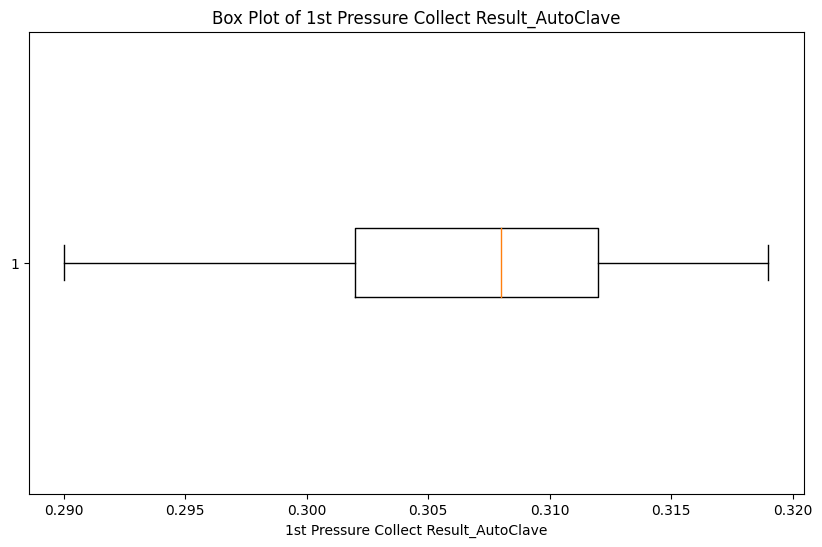

In [1997]:
plot_box(train_data, '1st Pressure Collect Result_AutoClave')

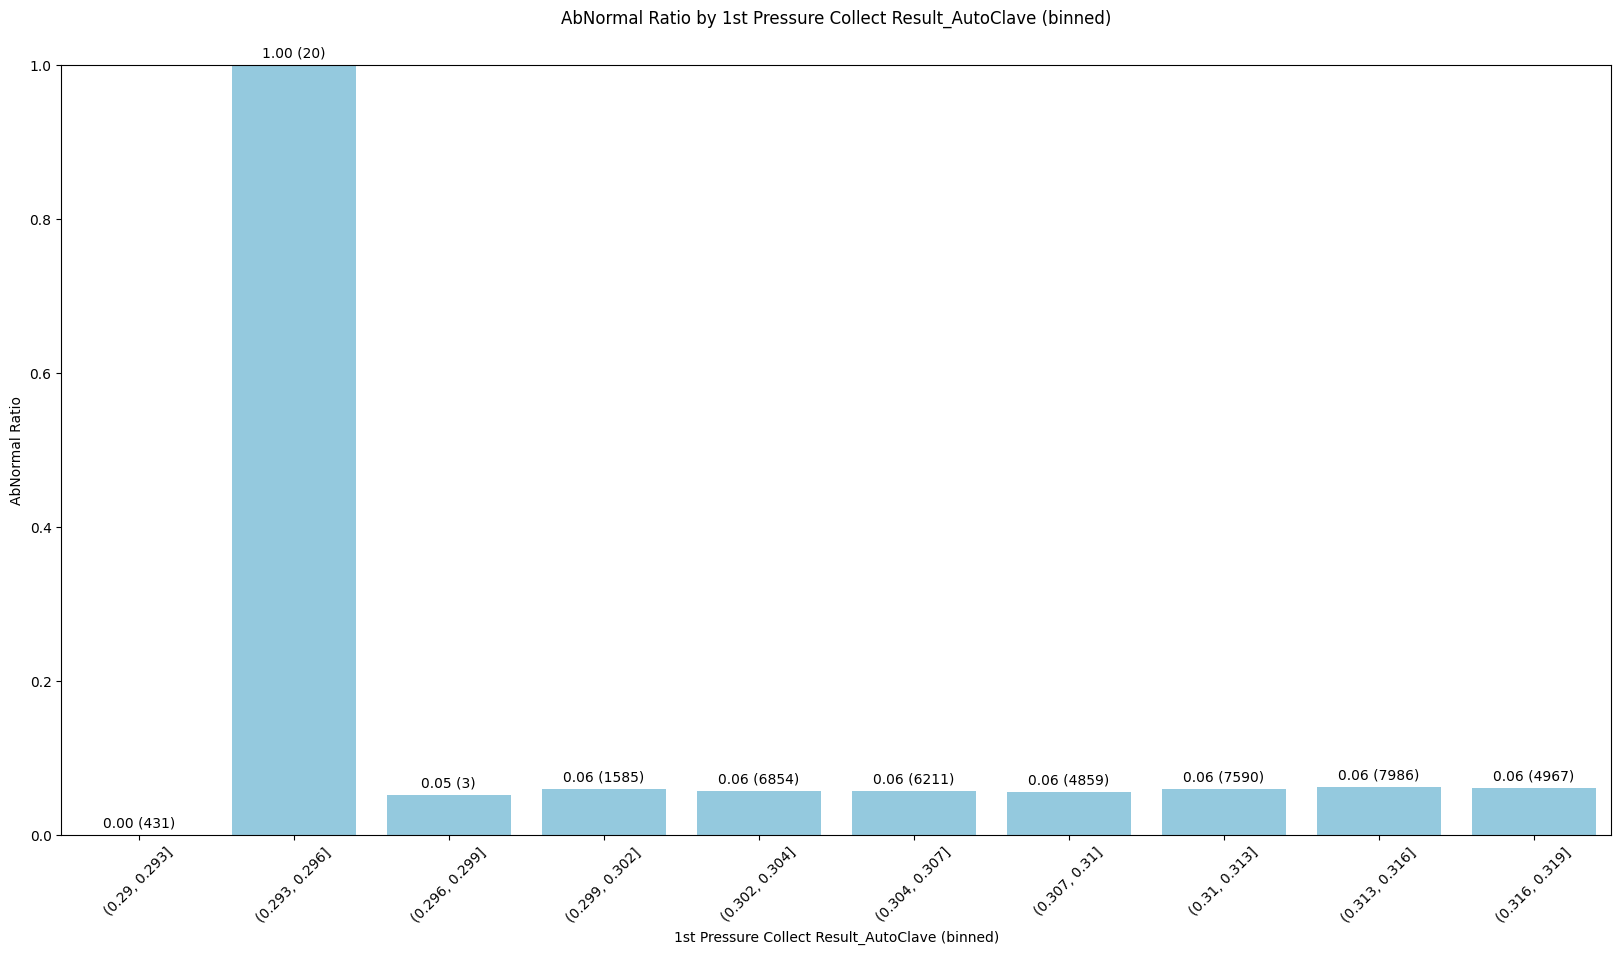

In [1998]:
plot_abnormal_ratio(train_data, '1st Pressure Collect Result_AutoClave', 'target', 'AbNormal',10)

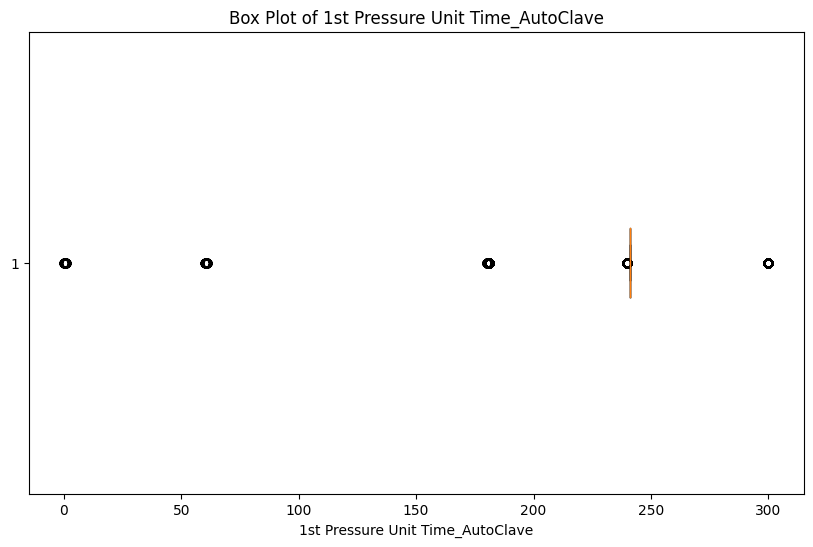

In [1999]:
plot_box(train_data, '1st Pressure Unit Time_AutoClave')

In [2000]:
train_data['1st Pressure Unit Time_AutoClave'].value_counts()

241    27788
240     8695
300     3606
181      224
180       66
61        47
0         32
1         30
60        18
Name: 1st Pressure Unit Time_AutoClave, dtype: int64

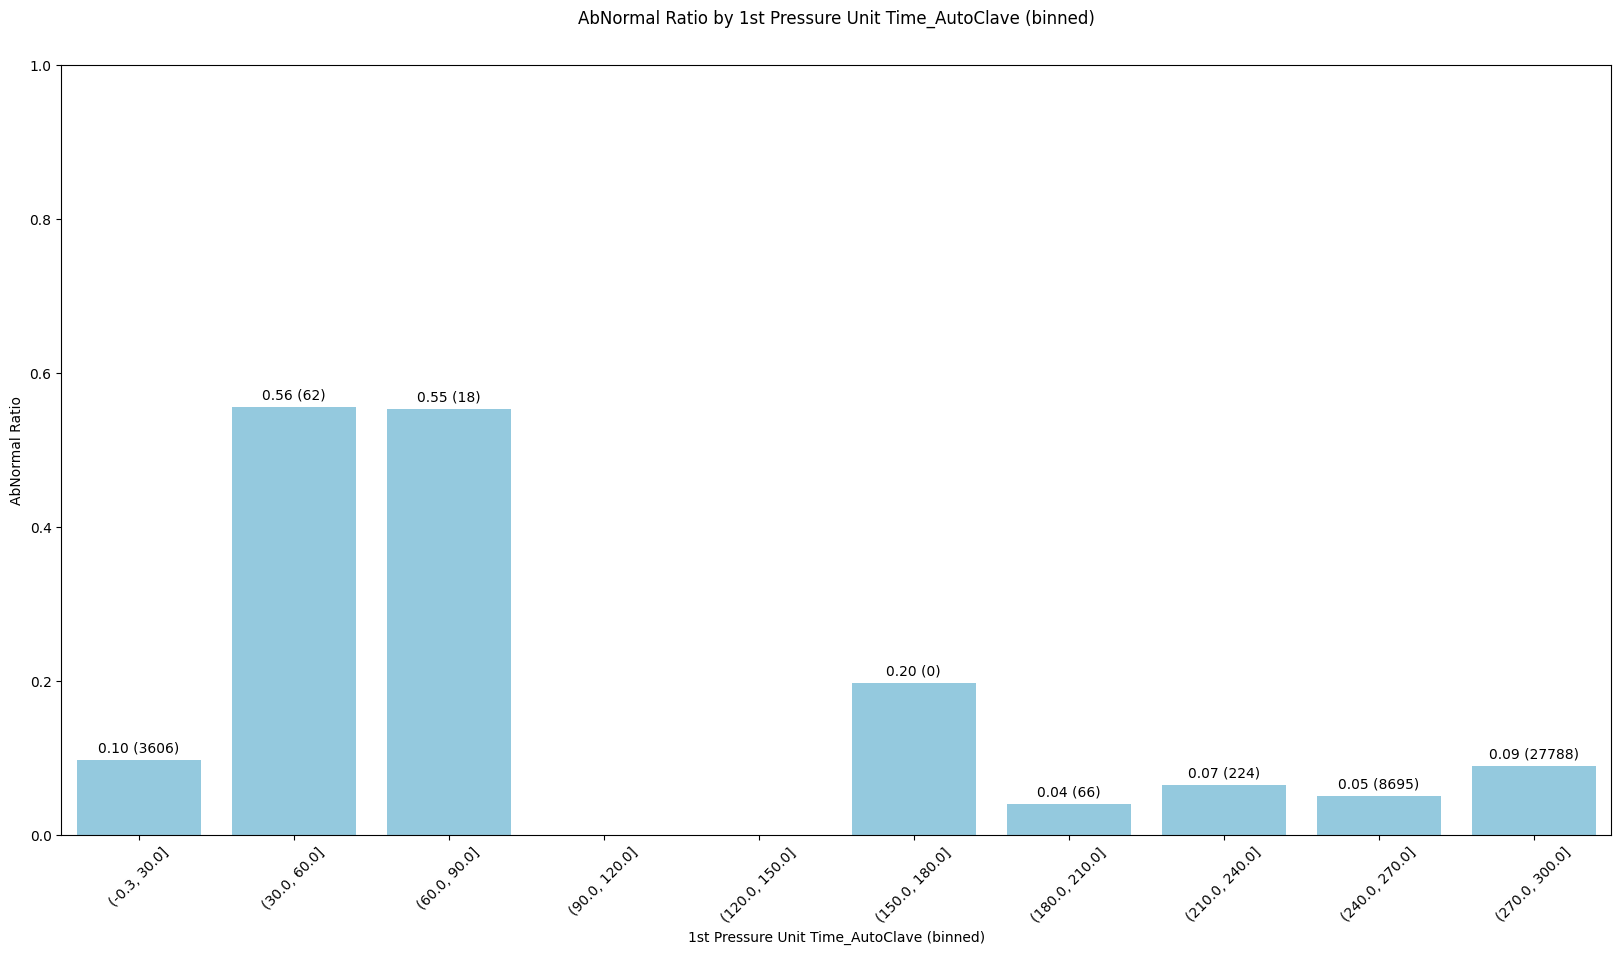

In [2001]:
plot_abnormal_ratio(train_data, '1st Pressure Unit Time_AutoClave', 'target', 'AbNormal',10)

In [2002]:
train_data['1st_Pressure_x_AutoClave'] = train_data['1st Pressure Collect Result_AutoClave'] * train_data['1st Pressure Unit Time_AutoClave'] 
test_data['1st_Pressure_x_AutoClave'] = test_data['1st Pressure Collect Result_AutoClave'] * test_data['1st Pressure Unit Time_AutoClave'] 

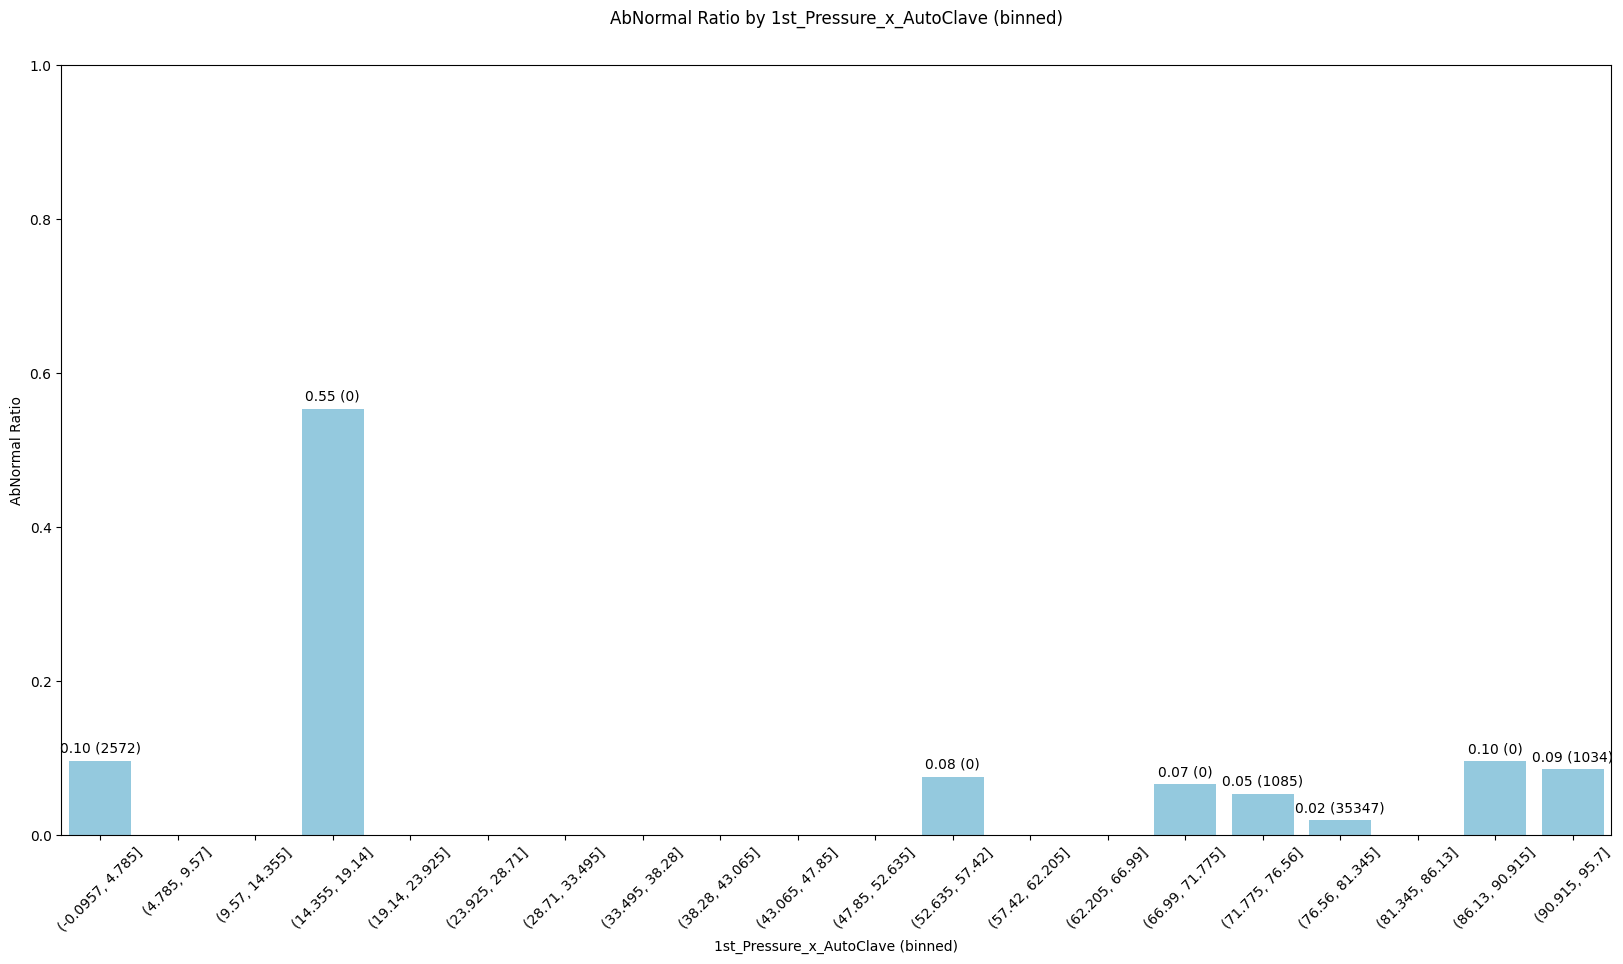

In [2003]:
plot_abnormal_ratio(train_data, '1st_Pressure_x_AutoClave', 'target', 'AbNormal',20)

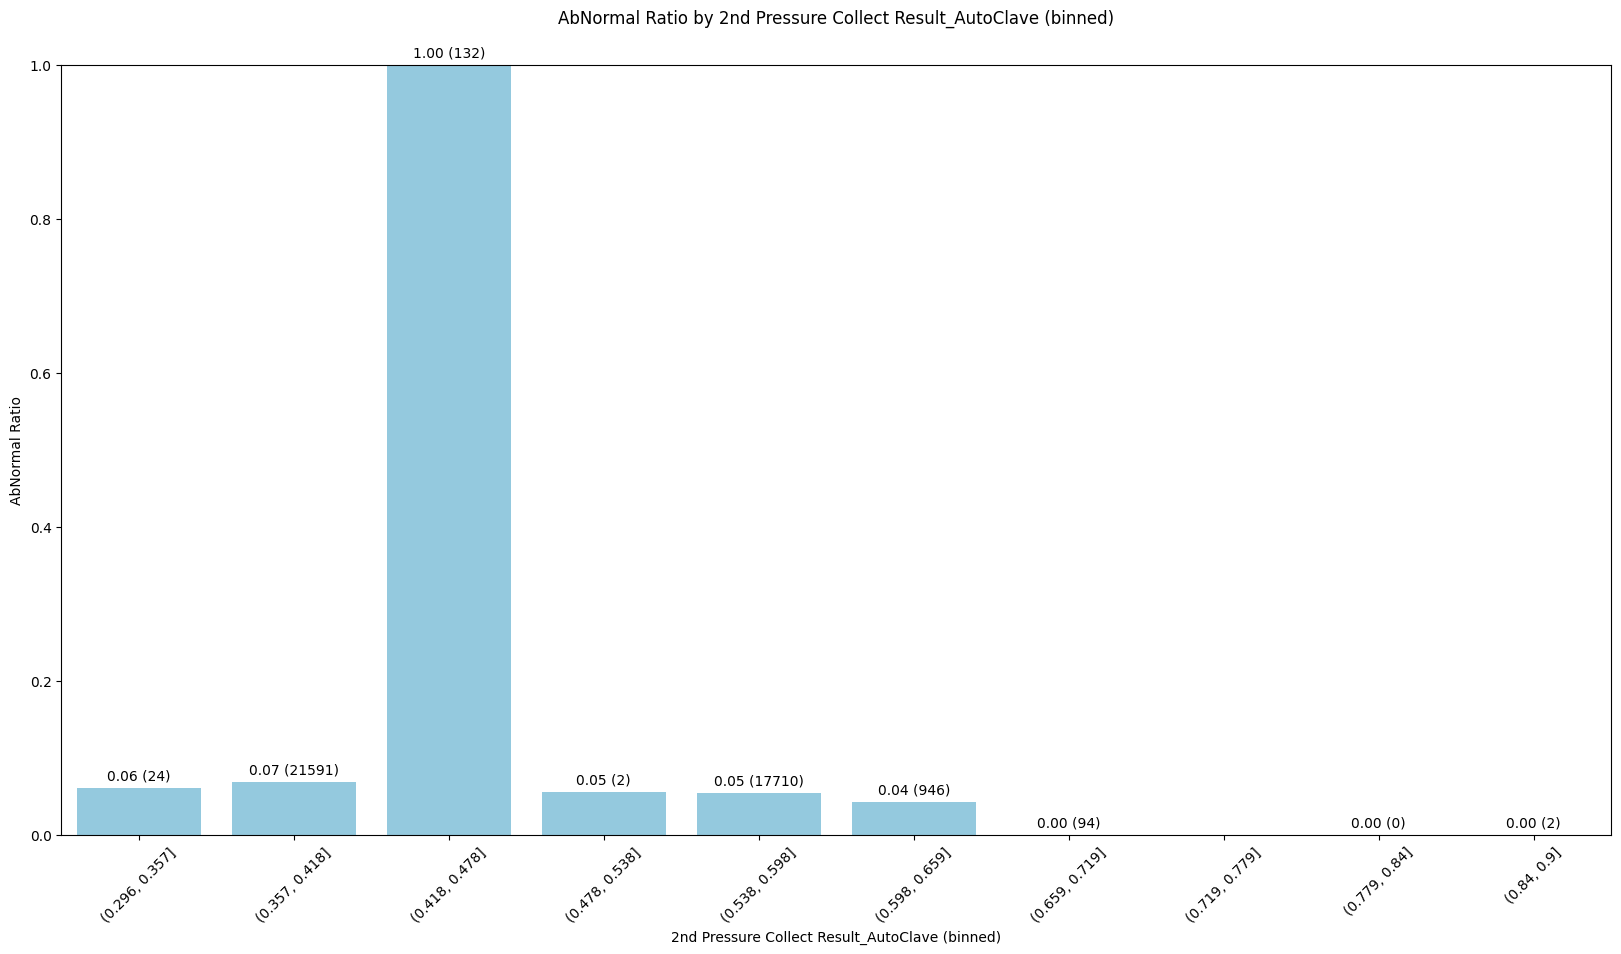

In [2004]:
plot_abnormal_ratio(train_data, '2nd Pressure Collect Result_AutoClave', 'target', 'AbNormal',10)

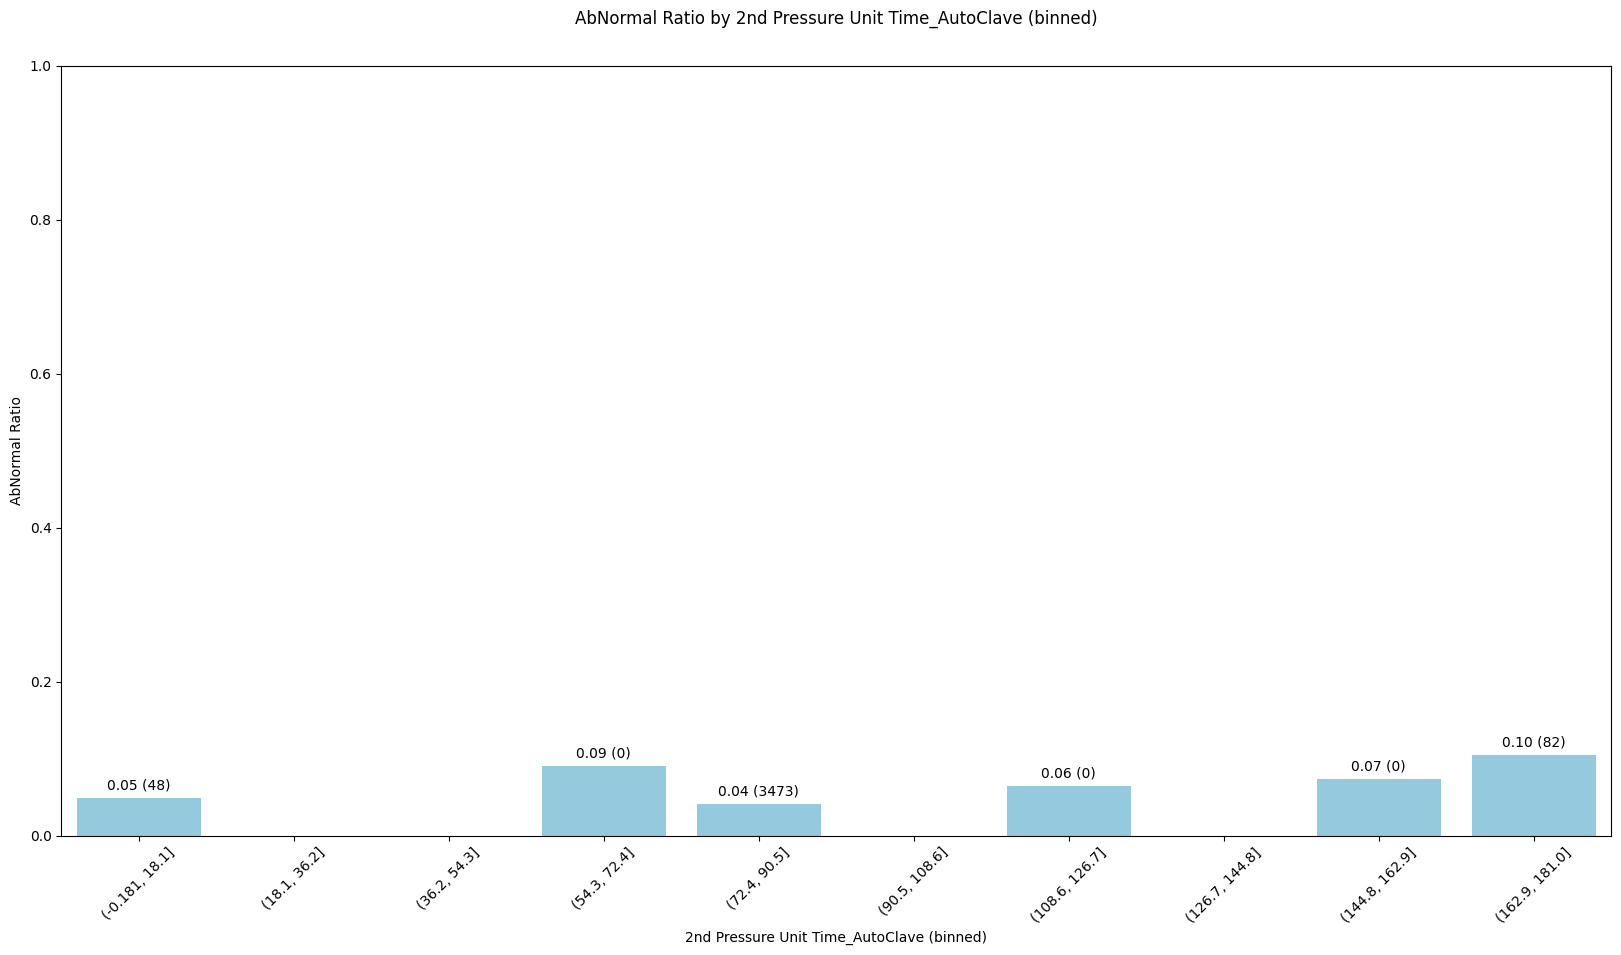

In [2005]:
plot_abnormal_ratio(train_data, '2nd Pressure Unit Time_AutoClave', 'target', 'AbNormal',10)

In [2006]:
train_data['2nd_Pressure_x_AutoClave'] = train_data['2nd Pressure Collect Result_AutoClave'] * train_data['2nd Pressure Unit Time_AutoClave'] 
test_data['2nd_Pressure_x_AutoClave'] = test_data['2nd Pressure Collect Result_AutoClave'] * test_data['2nd Pressure Unit Time_AutoClave'] 

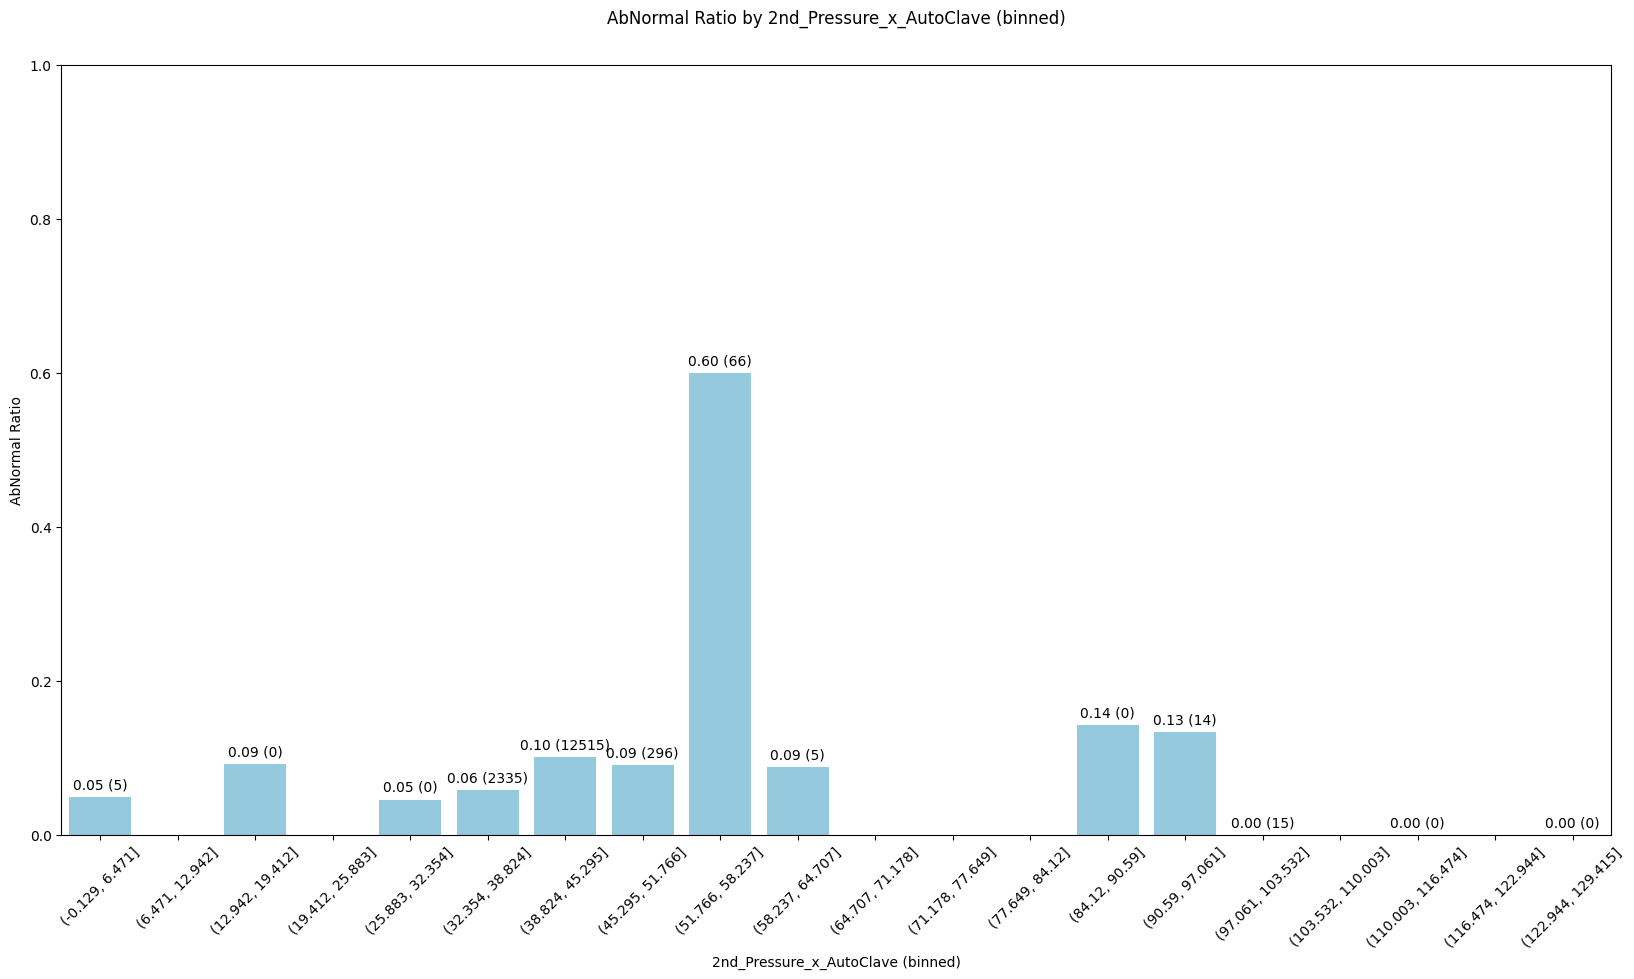

In [2007]:
plot_abnormal_ratio(train_data, '2nd_Pressure_x_AutoClave', 'target', 'AbNormal',20)

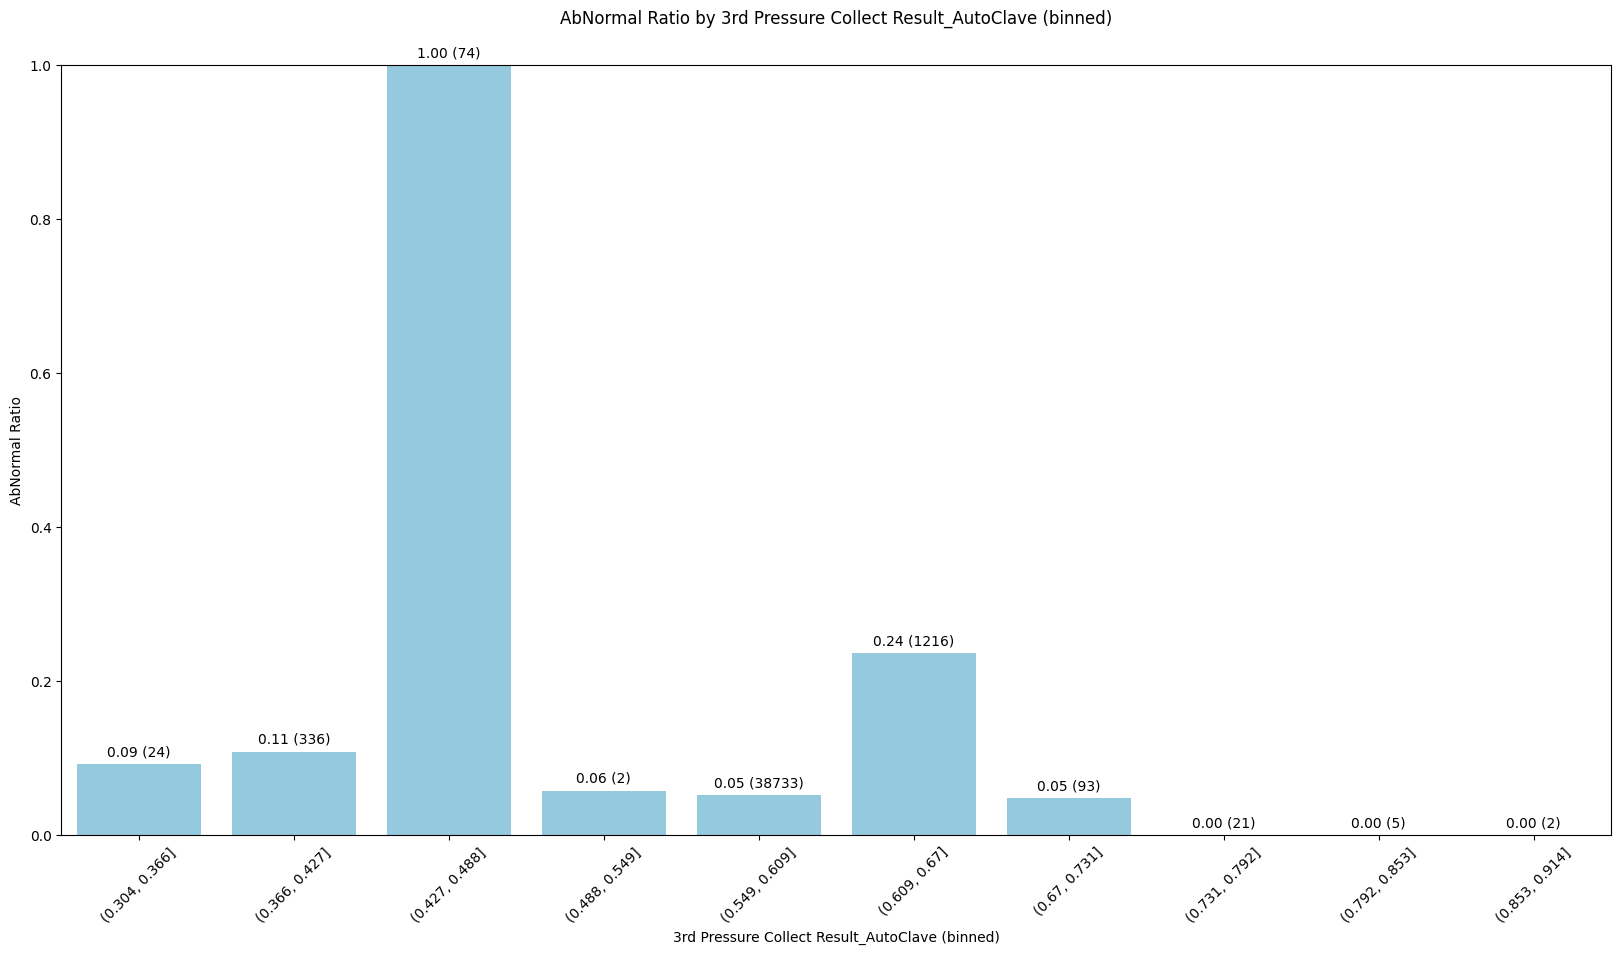

In [2008]:
plot_abnormal_ratio(train_data, '3rd Pressure Collect Result_AutoClave', 'target', 'AbNormal',10)

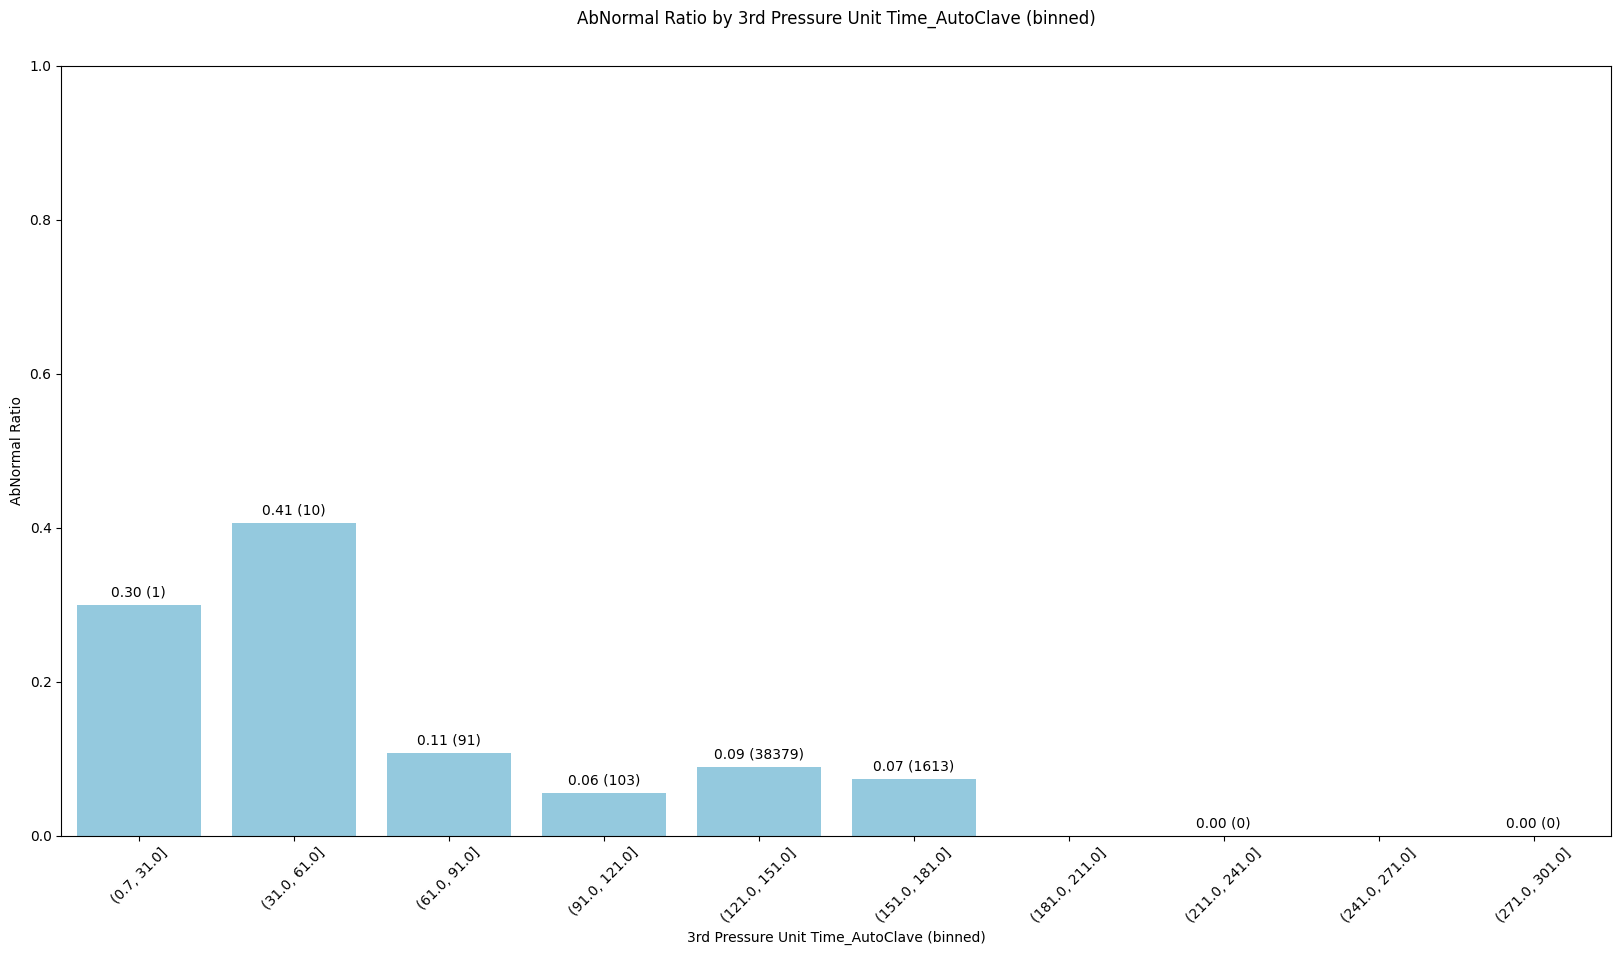

In [2009]:
plot_abnormal_ratio(train_data, '3rd Pressure Unit Time_AutoClave', 'target', 'AbNormal',10)

In [2010]:
train_data['3rd_Pressure_x_AutoClave'] = train_data['3rd Pressure Collect Result_AutoClave'] * train_data['3rd Pressure Unit Time_AutoClave'] 
test_data['3rd_Pressure_x_AutoClave'] = test_data['3rd Pressure Collect Result_AutoClave'] * test_data['3rd Pressure Unit Time_AutoClave'] 

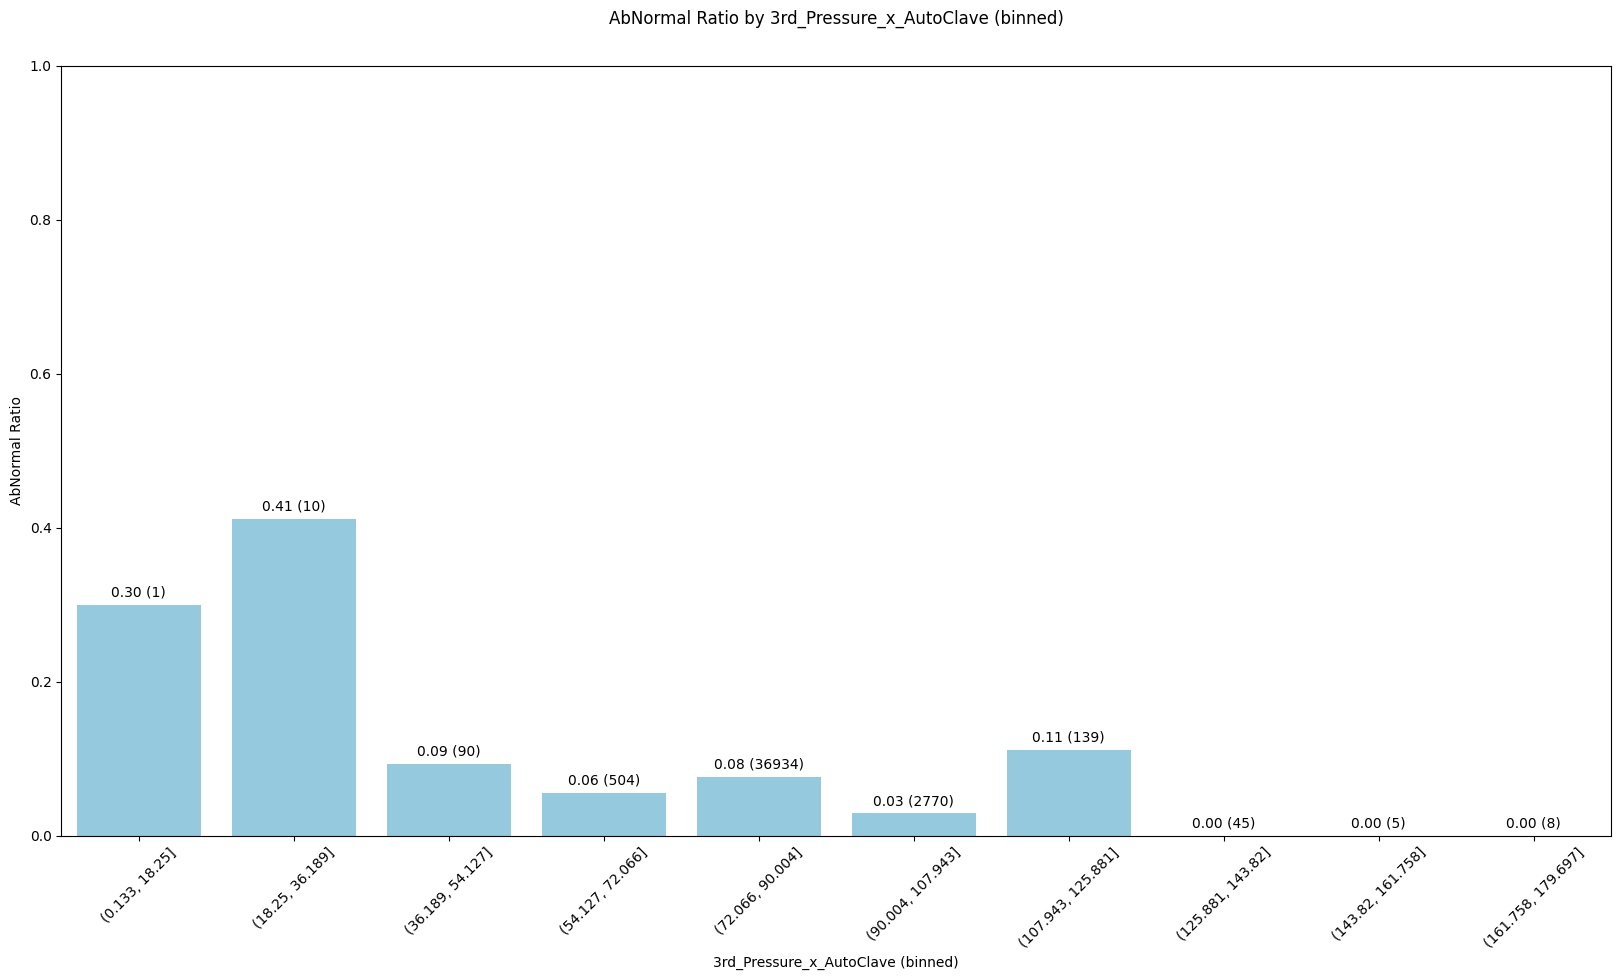

In [2011]:
plot_abnormal_ratio(train_data, '3rd_Pressure_x_AutoClave', 'target', 'AbNormal',10)

In [2012]:
train_data['3rd_Pressure_x_AutoClave'] = train_data['3rd Pressure Collect Result_AutoClave'] * train_data['3rd Pressure Unit Time_AutoClave'] 
test_data['3rd_Pressure_x_AutoClave'] = test_data['3rd Pressure Collect Result_AutoClave'] * test_data['3rd Pressure Unit Time_AutoClave'] 

In [2013]:
train_data['All_Pressure_x_AutoClave'] = train_data['1st_Pressure_x_AutoClave'] + train_data['2nd_Pressure_x_AutoClave'] + train_data['3rd_Pressure_x_AutoClave']
test_data['All_Pressure_x_AutoClave'] = test_data['1st_Pressure_x_AutoClave'] + test_data['2nd_Pressure_x_AutoClave'] + test_data['3rd_Pressure_x_AutoClave']

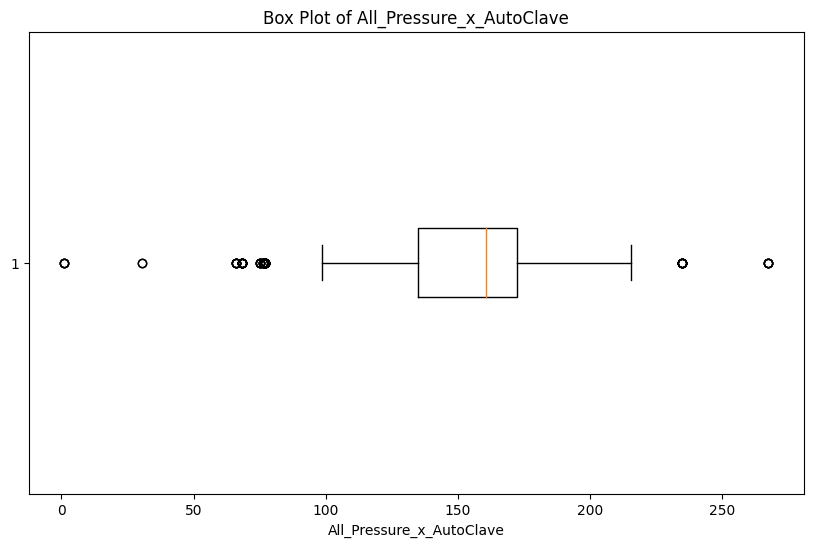

In [2014]:
plot_box(train_data, 'All_Pressure_x_AutoClave')

In [2015]:
import pandas as pd

# 데이터프레임에서 All_Pressure_x_AutoClave 열을 가져옵니다.
pressure_data = train_data['All_Pressure_x_AutoClave']

# IQR 계산
Q1 = pressure_data.quantile(0.25)
Q3 = pressure_data.quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
df_filtered = train_data[(pressure_data >= lower_bound) & (pressure_data <= upper_bound)]


In [2016]:
df_filtered.value_counts()

Series([], dtype: int64)

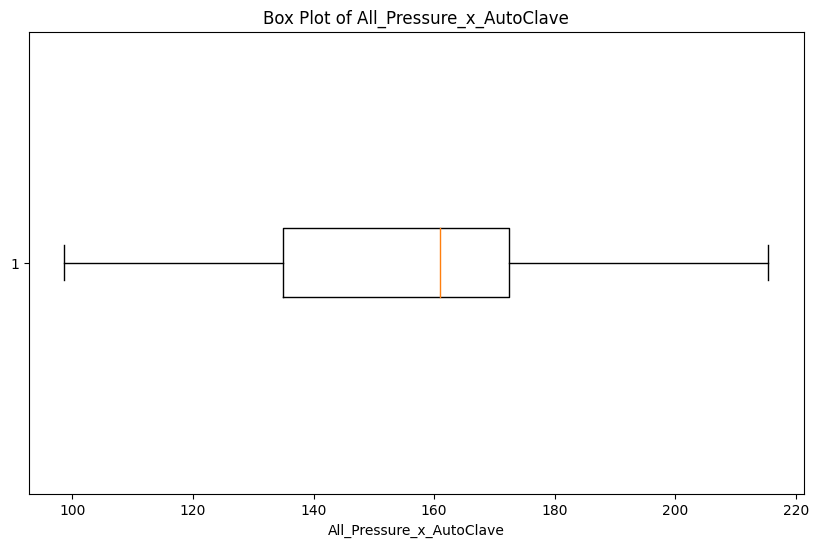

In [2017]:
plot_box(df_filtered, 'All_Pressure_x_AutoClave')

C:\Users\juneh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


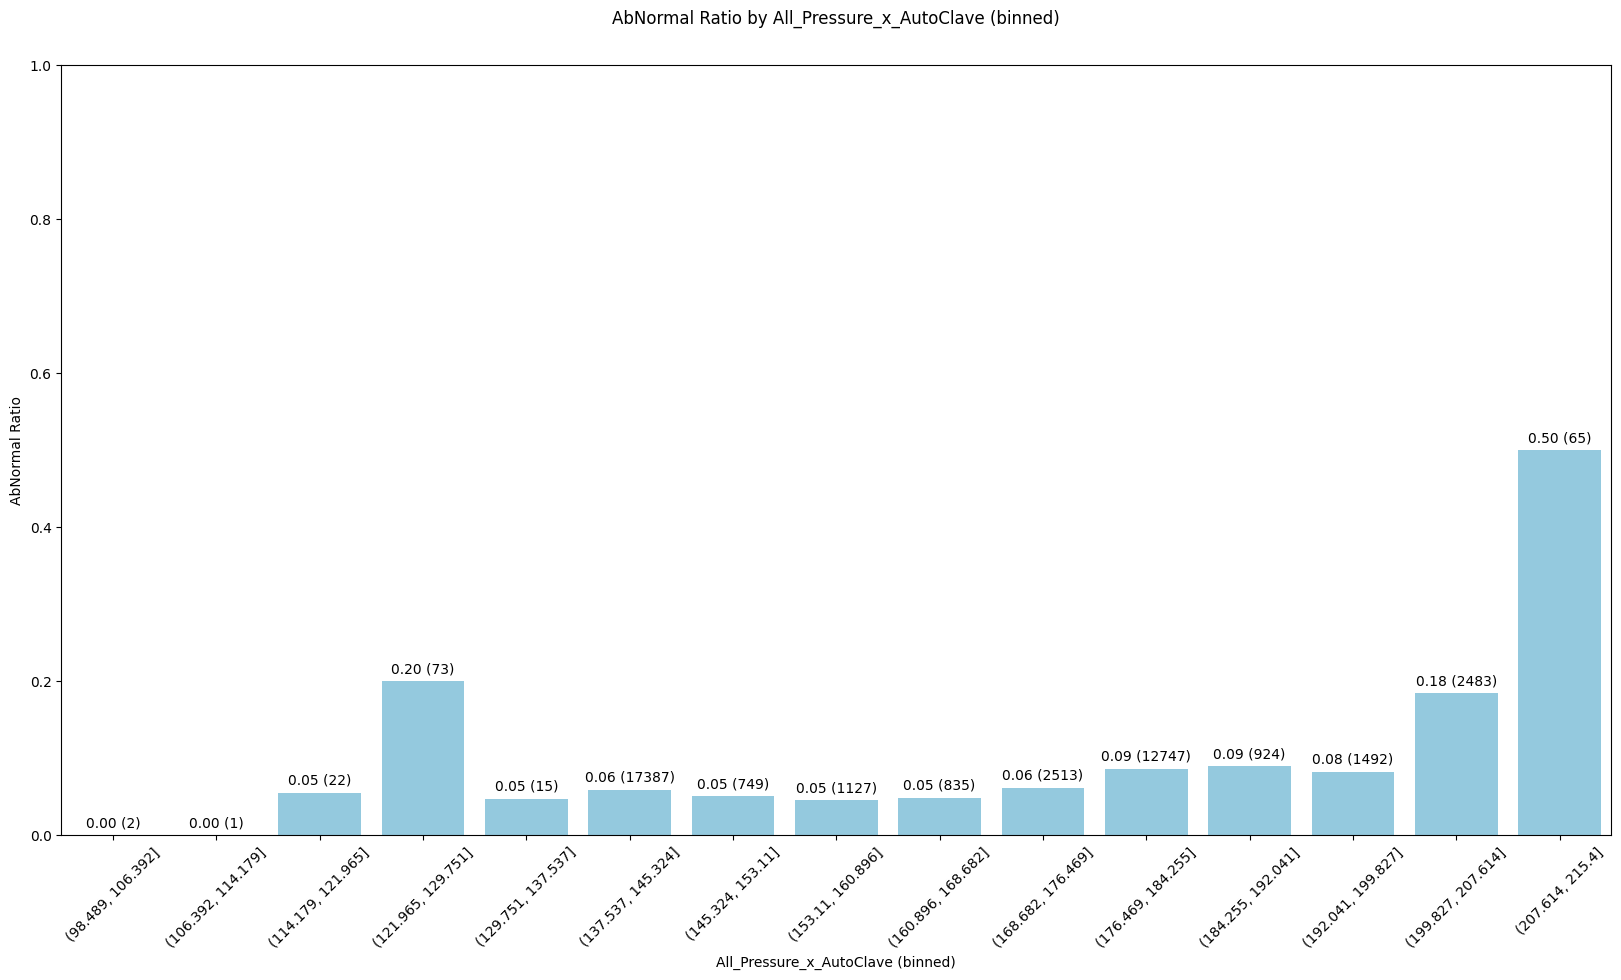

c:\Users\juneh\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [2018]:
plot_abnormal_ratio(df_filtered, 'All_Pressure_x_AutoClave', 'target', 'AbNormal',15)

In [2019]:
# '_AutoClave'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_AutoClave').columns

# 필터링된 열 이름 출력
print("필터링된 열 이름:")
for col in Process_Desc_col:
    print(col)

필터링된 열 이름:
1st Pressure Collect Result_AutoClave
1st Pressure Unit Time_AutoClave
2nd Pressure Collect Result_AutoClave
2nd Pressure Unit Time_AutoClave
3rd Pressure Collect Result_AutoClave
3rd Pressure Unit Time_AutoClave
Chamber_Temp_x_AutoClave
Chamber_Temp_ok_AutoClave
GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave
1st_Pressure_x_AutoClave
2nd_Pressure_x_AutoClave
3rd_Pressure_x_AutoClave
All_Pressure_x_AutoClave


In [2020]:
# 두 개의 변수로 그룹화하여 각 그룹마다 target 변수의 갯수 계산
grouped_counts = train_data.groupby(['Chamber_Temp_ok_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave', 'target']).size().reset_index(name='counts')

# 각 그룹별 target 변수의 비율 계산
grouped_counts['percentage'] = grouped_counts.groupby(['Chamber_Temp_ok_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave'])['counts'].apply(lambda x: x / x.sum() * 100)

# target이 AbNormal인 행만 필터링
abnormal_percentage = grouped_counts[grouped_counts['target'] == 'AbNormal'][['Chamber_Temp_ok_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave', 'percentage']]

# 결과 출력
print(abnormal_percentage)

   Chamber_Temp_ok_AutoClave  GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave  \
0                          0                                         0   
2                          0                                         1   
4                          1                                         0   
6                          1                                         1   

   percentage  
0    6.264530  
2    4.315430  
4    6.378327  
6    4.422696  


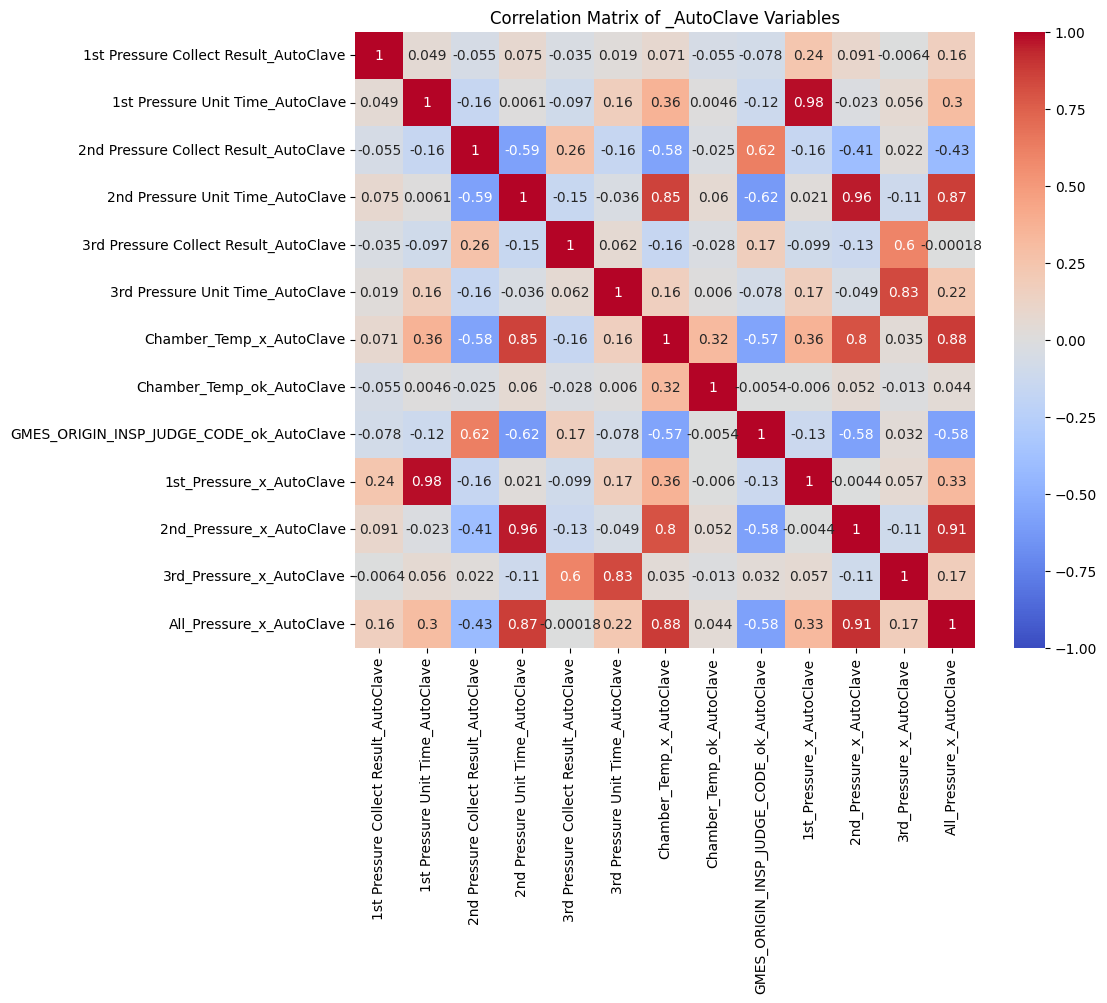

In [2021]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# '_AutoClave'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_AutoClave').columns

# 필터링된 열들에 대해 상관계수 계산
correlation_matrix = train_data[Process_Desc_col].corr()

# 상관계수 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of _AutoClave Variables')
plt.show()

In [2022]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# '_AutoClave'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_AutoClave').columns

# 다중공선성(VIF) 계산
X = train_data[Process_Desc_col].dropna()  # 결측값 제거
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 값 출력
print(vif_data)

                                     Feature           VIF
0      1st Pressure Collect Result_AutoClave  1.595353e+04
1           1st Pressure Unit Time_AutoClave  1.991497e+04
2      2nd Pressure Collect Result_AutoClave  7.657697e+01
3           2nd Pressure Unit Time_AutoClave  8.765291e+01
4      3rd Pressure Collect Result_AutoClave  1.663806e+04
5           3rd Pressure Unit Time_AutoClave  1.681071e+04
6                   Chamber_Temp_x_AutoClave  7.651879e+02
7                  Chamber_Temp_ok_AutoClave  8.010403e+00
8   GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave  3.108415e+00
9                   1st_Pressure_x_AutoClave           inf
10                  2nd_Pressure_x_AutoClave           inf
11                  3rd_Pressure_x_AutoClave           inf
12                  All_Pressure_x_AutoClave           inf


c:\Users\juneh\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [2023]:
# # 변수 제거
# train_data.drop(columns=['1st_Pressure_x_AutoClave'
#                          , '2nd_Pressure_x_AutoClave'
#                          , '3rd_Pressure_x_AutoClave'
#                          , 'All_Pressure_x_AutoClave'], inplace=True)
# test_data.drop(columns=['1st_Pressure_x_AutoClave'
#                          , '2nd_Pressure_x_AutoClave'
#                          , '3rd_Pressure_x_AutoClave'
#                          , 'All_Pressure_x_AutoClave'], inplace=True)

In [2024]:
# 변수 제거
train_data.drop(columns=['1st Pressure Collect Result_AutoClave', '1st Pressure Unit Time_AutoClave'
                         , '2nd Pressure Collect Result_AutoClave', '2nd Pressure Unit Time_AutoClave'
                         , '3rd Pressure Collect Result_AutoClave' , '3rd Pressure Unit Time_AutoClave'], inplace=True)
test_data.drop(columns=['1st Pressure Collect Result_AutoClave', '1st Pressure Unit Time_AutoClave'
                         , '2nd Pressure Collect Result_AutoClave', '2nd Pressure Unit Time_AutoClave'
                         , '3rd Pressure Collect Result_AutoClave' , '3rd Pressure Unit Time_AutoClave'], inplace=True)

In [2025]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# '_AutoClave'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_AutoClave').columns

# 다중공선성(VIF) 계산
X = train_data[Process_Desc_col].dropna()  # 결측값 제거
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 값 출력
print(vif_data)

                                    Feature         VIF
0                  Chamber_Temp_x_AutoClave  335.573392
1                 Chamber_Temp_ok_AutoClave    5.752370
2  GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave    2.127332
3                  1st_Pressure_x_AutoClave         inf
4                  2nd_Pressure_x_AutoClave         inf
5                  3rd_Pressure_x_AutoClave         inf
6                  All_Pressure_x_AutoClave         inf


c:\Users\juneh\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


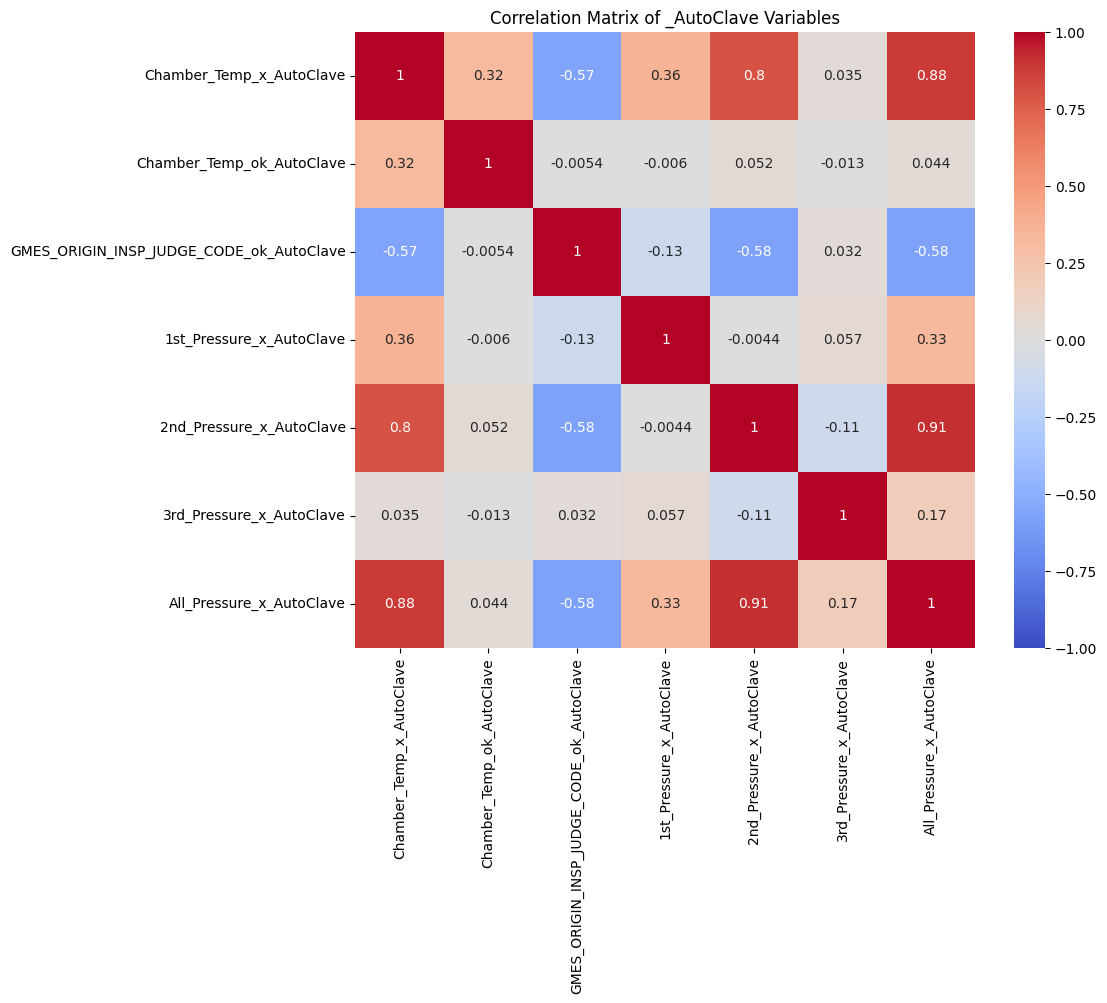

In [2026]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# '_AutoClave'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_AutoClave').columns

# 필터링된 열들에 대해 상관계수 계산
correlation_matrix = train_data[Process_Desc_col].corr()

# 상관계수 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of _AutoClave Variables')
plt.show()

In [2027]:
# 변수 제거
train_data.drop(columns=['All_Pressure_x_AutoClave'], inplace=True)
test_data.drop(columns=['All_Pressure_x_AutoClave'], inplace=True)

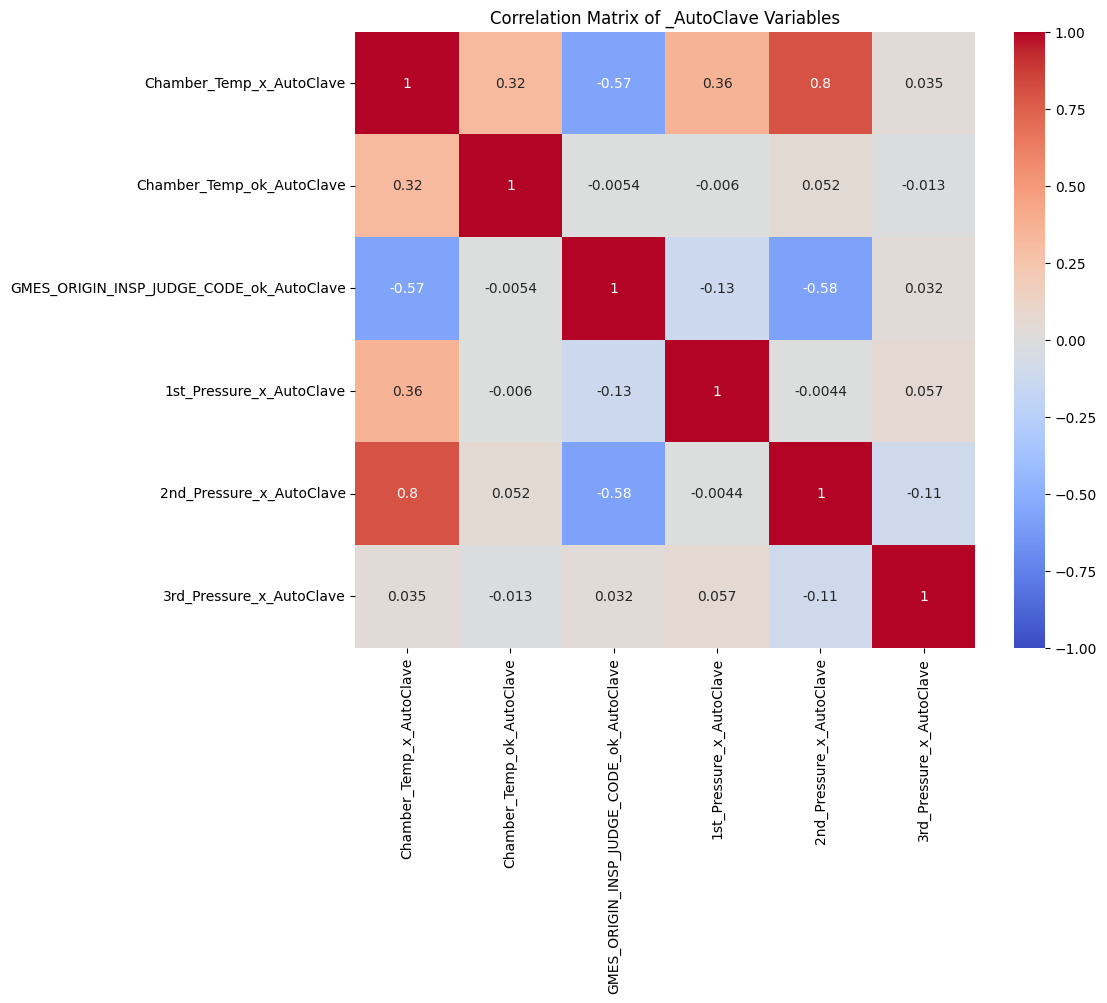

In [2028]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# '_AutoClave'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_AutoClave').columns

# 필터링된 열들에 대해 상관계수 계산
correlation_matrix = train_data[Process_Desc_col].corr()

# 상관계수 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of _AutoClave Variables')
plt.show()

In [2029]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# '_AutoClave'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_AutoClave').columns

# 다중공선성(VIF) 계산
X = train_data[Process_Desc_col].dropna()  # 결측값 제거
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 값 출력
print(vif_data)

                                    Feature         VIF
0                  Chamber_Temp_x_AutoClave  335.630999
1                 Chamber_Temp_ok_AutoClave    5.752370
2  GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave    2.127332
3                  1st_Pressure_x_AutoClave  197.321616
4                  2nd_Pressure_x_AutoClave   11.648266
5                  3rd_Pressure_x_AutoClave   81.228262


vif 개 높긴한데.. 모든 변수간에 상관계수가 0.8이하임으로 위의 변수에서 더이상의 drop 진행안함

In [2030]:
# '_AutoClave'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_AutoClave').columns

# 필터링된 열 이름 출력
print("필터링된 열 이름:")
for col in Process_Desc_col:
    print(col)

필터링된 열 이름:
Chamber_Temp_x_AutoClave
Chamber_Temp_ok_AutoClave
GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave
1st_Pressure_x_AutoClave
2nd_Pressure_x_AutoClave
3rd_Pressure_x_AutoClave


AutoClave 공정 관련 변수로 6개 사용

## Fill1

## Fill2

---